<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Project Planning</strong></h1>

When starting any project, I like to outline the steps that I plan to take. Below is the rough outline that I created for this project using commented cells.

#### Understand nature of the data .info() .describe()
#### Histograms and boxplots 
#### Value counts 
#### Missing data 
#### Correlation between the metrics 
#### Explore interesting themes  
#### Feature engineering 
#### preprocess data together or use a transformer? 
    # use label for train and test   
#### Scaling?

#### Model Baseline 
#### Model comparison with CV
#### Hypothesis forming

<hr>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

### 1. [OVERVIEW AND IMPORTING DATA](#1)

1.1 [Overview](#1.1)

1.2 [Required  Libraries](#1.2)

<br>

### 2. [Data Preparation & Data exploration (EDA)](#2)

2.1 [Number of Accidents per State](#2.1)

2.2 [Most frequent words in the description](#2.2)

2.3 [Most frequent road features](#2.3)

2.4 [Medium distance by severity](#2.4)

2.5 [Weather condition histogram](#2.5)

2.6 [Number of accidents for weekday](#2.6)

<!-- 
2.1 [Number of Accidents per State](#2.1)

2.2 [Most frequent words in the description](#2.2)

2.3 [Most frequent road features](#2.3)

2.4 [Medium distance by severity](#2.4)

2.5 [Weather condition histogram](#2.5)

2.6 [Number of accidents for weekday](#2.6) -->


<br>

### 3. [Feature engineering](#3)
    

3.1 [Feature addition](#3.1)

3.2 [Check correlation between features](#3.2)

3.3 [Feature selection](#3.3)

3.4 [Drop duplicates](#3.4)

3.5 [Handle erroneous and missing values](#3.5)

3.6 [Check features variance](#3.6)

3.7 [Handle unbalanced data](#3.7)

3.8 [Feature scaling](#3.8)

3.9 [Feature encoding](#3.9)

<br>

### 4. [Model training](#4)

4.1 [Logistic regression](#4.1)

4.2 [Decision Tree](#4.2)

4.3 [Random Forest](#4.3)

<br>

### 5. [Model evaluation and export](#5)

<br>

### 6. [References](#6)



<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Overview Dataset</strong></h1>

<a id="1.1"></a>
# 1.1 Overview

[Dataset Details](https://smoosavi.org/datasets/us_accidents)


**Traffic Attributes (12)**:

* **ID**: This is a unique identifier of the accident record.

* **Severity**: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

* **Start_Time**: Shows start time of the accident in local time zone.

* **End_Time**: Shows end time of the accident in local time zone.

* **Start_Lat**: Shows latitude in GPS coordinate of the start point.

* **Start_Lng**: Shows longitude in GPS coordinate of the start point.

* **End_Lat**: Shows latitude in GPS coordinate of the end point.

* **End_Lng**: Shows longitude in GPS coordinate of the end point.

* **Distance(mi)**: The length of the road extent affected by the accident.


**Address Attributes (9)**:

* **Number**: Shows the street number in address field.

* **Street**: Shows the street name in address field.

* **Side**: Shows the relative side of the street (Right/Left) in address field.

* **City**: Shows the city in address field.

* **County**: Shows the county in address field.

* **State**: Shows the state in address field.

* **Zipcode**: Shows the zipcode in address field.

* **Country**: Shows the country in address field.

* **Timezone**: Shows timezone based on the location of the accident (eastern, central, etc.).

**Weather Attributes (11)**:

* **Airport_Code**: Denotes an airport-based weather station which is the closest one to location of the accident.

* **Weather_Timestamp**: Shows the time-stamp of weather observation record (in local time).

* **Temperature(F)**: Shows the temperature (in Fahrenheit).

* **Wind_Chill(F)**: Shows the wind chill (in Fahrenheit).

* **Humidity(%)**: Shows the humidity (in percentage).

* **Pressure(in)**: Shows the air pressure (in inches).

* **Visibility(mi)**: Shows visibility (in miles).

* **Wind_Direction**: Shows wind direction.

* **Wind_Speed(mph)**: Shows wind speed (in miles per hour).

* **Precipitation(in)**: Shows precipitation amount in inches, if there is any.

* **Weather_Condition**: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).

**POI Attributes (13)**:

* **Amenity**: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.

* **Bump**: A POI annotation which indicates presence of speed bump or hump in a nearby location.

* **Crossing**: A POI annotation which indicates presence of crossing in a nearby location.

* **Give_Way**: A POI annotation which indicates presence of give_way sign in a nearby location.

* **Junction**: A POI annotation which indicates presence of junction in a nearby location.

* **No_Exit**: A POI annotation which indicates presence of no_exit sign in a nearby location.

* **Railway**: A POI annotation which indicates presence of railway in a nearby location.

* **Roundabout**: A POI annotation which indicates presence of roundabout in a nearby location.

* **Station**: A POI annotation which indicates presence of station (bus, train, etc.) in a nearby location.

* **Stop**: A POI annotation which indicates presence of stop sign in a nearby location.

* **Traffic_Calming**: A POI annotation which indicates presence of traffic_calming means in a nearby location.

* **Traffic_Signal**: A POI annotation which indicates presence of traffic_signal in a nearby location.

* **Turning_Loop**: A POI annotation which indicates presence of turning_loop in a nearby location.

**Period-of-Day (4)**:

* **Sunrise_Sunset**: Shows the period of day (i.e. day or night) based on sunrise/sunset.

* **Civil_Twilight**: Shows the period of day (i.e. day or night) based on civil twilight.

* **Nautical_Twilight**: Shows the period of day (i.e. day or night) based on nautical twilight.

* **Astronomical_Twilight**: Shows the period of day (i.e. day or night) based on astronomical twilight.

<a id="1.2"></a>
# 1.2 Required  Libraries

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} missingno

# work with data in tabular representation
from datetime import time

import pandas as pd
# round the data in the correlation matrix
import numpy as np
# module for regular expression
import re

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.gridspec as gridspec
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import matplotlib.style as style
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# run a python file 
%run function.py

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Eror Messages
import warnings

warnings.filterwarnings('ignore')

Solving environment: done

## Package Plan ##

  environment location: /Users/taa/opt/anaconda3

  added / updated specs:
    - missingno


The following NEW packages will be INSTALLED:

  missingno          pkgs/main/noarch::missingno-0.4.2-pyhd3eb1b0_1

The following packages will be UPDATED:

  conda                               4.10.1-py38hecd8cb5_1 --> 4.11.0-py38hecd8cb5_0


Preparing transaction: done
Verifying transaction: failed

EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: /Users/taa/opt/anaconda3
  uid: 1163210130
  gid: 721532113




In [2]:
# check version of Numpy (to create a requirements.txt)
np.__version__

'1.20.1'

In [3]:
# check version of Pandas (to create a requirements.txt)
pd.__version__

'1.2.4'

<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Preparation & Data exploration (EDA)</strong></h1>

<a id="2.1"></a>
# 2.1 Data Preparation

Perform all necessary data cleaning and preparation for train, test, validation

[Detail of the dataset](https://smoosavi.org/datasets/us_accidents)

#### Original Memory usage of each dataset
+ TRAIN: memory usage: 120.1+ MB
+ TEST: memory usage: 40.0+ MB
+ VALIDATION: memory usage: 40.0+ MB

#### Understand the problem
+ Data Type: Tabular data
+ Problem Type:  Regression
+ Evaludation Metric: RMSE, MSE, MAE, R2

#### I drop `ResponseId` to avoid leakage of the data. 
The unique identifier of the accident record is not relevant for this problem. So I will omit it from all DataFrames and call the `info()` method to **check their high level information**

In [4]:
from function import style
%time

# TRAIN
# read and drop drop ID column-wise
# train = pd.read_csv('cosc2789-2021/train.csv', parse_dates=['End_Time', 'Start_Time', 'Weather_Timestamp']).drop("ID", axis=1)
train = pd.read_csv('cosc2789-2021/train.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The TRAIN Dataframe contain {train.shape[0]} records and {train.shape[1]} columns.\n\n')  # 454819 rows and 45 columns
# lets make end time as index
train = train.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(train.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
# style(train.head(3))


# VALIDATION
# read and drop drop ID column-wise
validation = pd.read_csv('cosc2789-2021/val.csv').drop("ID", axis=1)
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The VALIDATION Dataframe contain {validation.shape[0]} records and {validation.shape[1]} columns.\n\n')  # 151606 rows and 45 columns
# lets make end time as index
validation = validation.sort_values(by=['End_Time'])
# use the .info() method, which will print out a concise summary of the DataFrame:
print(validation.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
# style(validation.head(3))


# TRAIN
# read and drop drop ID column-wise
test = pd.read_csv('cosc2789-2021/test.csv')
# method to find the number of columns is to use .shape, which prints out the full dimensions of the data:
print(f'The TEST Dataframe contain {test.shape[0]} records and {test.shape[1]} columns.\n\n')  # 151607 rows and 44 columns
# lets make end time as index
# use the .info() method, which will print out a concise summary of the DataFrame:
print(test.info())
print('--------------------------------------------------------------------------')
# print out first 3 lines of the dataframe
style(test.head(3))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs
The TRAIN Dataframe contain 454819 records and 45 columns.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 454819 entries, 377127 to 391941
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               454819 non-null  int64  
 1   Start_Time             454819 non-null  object 
 2   End_Time               454819 non-null  object 
 3   Start_Lat              454819 non-null  float64
 4   Start_Lng              454819 non-null  float64
 5   End_Lat                454819 non-null  float64
 6   End_Lng                454819 non-null  float64
 7   Distance(mi)           454819 non-null  float64
 8   Number                 140896 non-null  float64
 9   Street                 454819 non-null  object 
 10  Side                   454819 non-null  object 
 11  City                   454796 non-null  object 
 12  County      

,ID,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-3056781,2020-12-15 18:06:30,2020-12-16 03:35:30,33.708096,-117.780277,33.733073,-117.814465,2.615000,nan,I-5 N,R,Irvine,Orange,CA,92620,US,US/Pacific,KSNA,2020-12-15 17:53:00,63.000000,63.000000,40.000000,30.110000,10.000000,CALM,0.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
1,A-3861069,2019-09-25 17:57:00,2019-09-25 19:18:45,37.660428,-122.403812,37.660428,-122.403812,0.000000,nan,Bayshore Fwy N,R,South San Francisco,San Mateo,CA,94080,US,US/Pacific,KSFO,2019-09-25 17:56:00,87.000000,87.000000,29.000000,29.700000,10.000000,W,18.000000,0.000000,Partly Cloudy,False,False,False,False,False,False,False,False,True,False,False,False,False,Day,Day,Day,Day
2,A-3283070,2020-11-06 18:57:10,2020-11-06 21:32:23,45.647664,-111.351367,45.648531,-111.351319,0.060000,nan,Axtell Anceny Rd,R,Bozeman,Gallatin,MT,59718,US,US/Mountain,KBZN,2020-11-06 18:56:00,45.000000,45.000000,68.000000,25.180000,10.000000,CALM,0.000000,0.000000,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night


### ---------------> OBSERVATION
<hr>
The TRAIN Dataframe contain 454819 records and 45 columns.
There are  454819 training examples in the dataset, this is a good sign since there seems to be large enough data for machine learning. The shape of the dataset tells is that I have 45 attributes. Of the 45 attributes, one is the target variable that the model should predict. This means that I have 44 attributes that have the potential to be used to train my future predictive model.
<hr>

<br><br>
<a id="2.2"></a>
# Task 2.2: Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype dtype (string)¶
+ Numeric data should have for example the same number of digits after the point. 
The `astype()` function supports all datatypes described at [this link](https://www.pytables.org/usersguide/datatypes.html).

In [5]:
# convert columns to the best possible dtypes, object->string
train = train.convert_dtypes()
test = test.convert_dtypes()
validation = validation.convert_dtypes()

## --------> OBSERVATION

<hr>
The method .info() is great for checking out the data types of the different features already coverted into the desired types and non-null values. However, it is not great for getting a visual picture of what is missing for the different features. You will use missingno for this
<hr>

<br><br>
<a id="2.3"></a>
# 2.3 Missing Values
<a id="2.3.1"></a>
### 2.3.1 Guess the missingness type 

#### 3 types of missingness patterns:
+ Missing completely at Random (MCAR)
+ Missing at Random (MAR)
+ Missing Not at Random (MNAR)

I'll first visualize the missingness summary and then identify the types of missingness the DataFrame contains.

Missing values in TRAIN in ascending: 
                         Total  Percent
Number                 313923    69.02
Precipitation(in)      153417    33.73
Wind_Chill(F)          134958    29.67
Wind_Speed(mph)         38716     8.51
Humidity(%)             13670     3.01
Visibility(mi)          13276     2.92
Weather_Condition       13196     2.90
Temperature(F)          12910     2.84
Wind_Direction          12570     2.76
Pressure(in)            10865     2.39
Weather_Timestamp        9104     2.00
Airport_Code             1294     0.28
Timezone                  690     0.15
Zipcode                   277     0.06
Sunrise_Sunset             23     0.01
Civil_Twilight             23     0.01
Nautical_Twilight          23     0.01
Astronomical_Twilight      23     0.01
City                       23     0.01


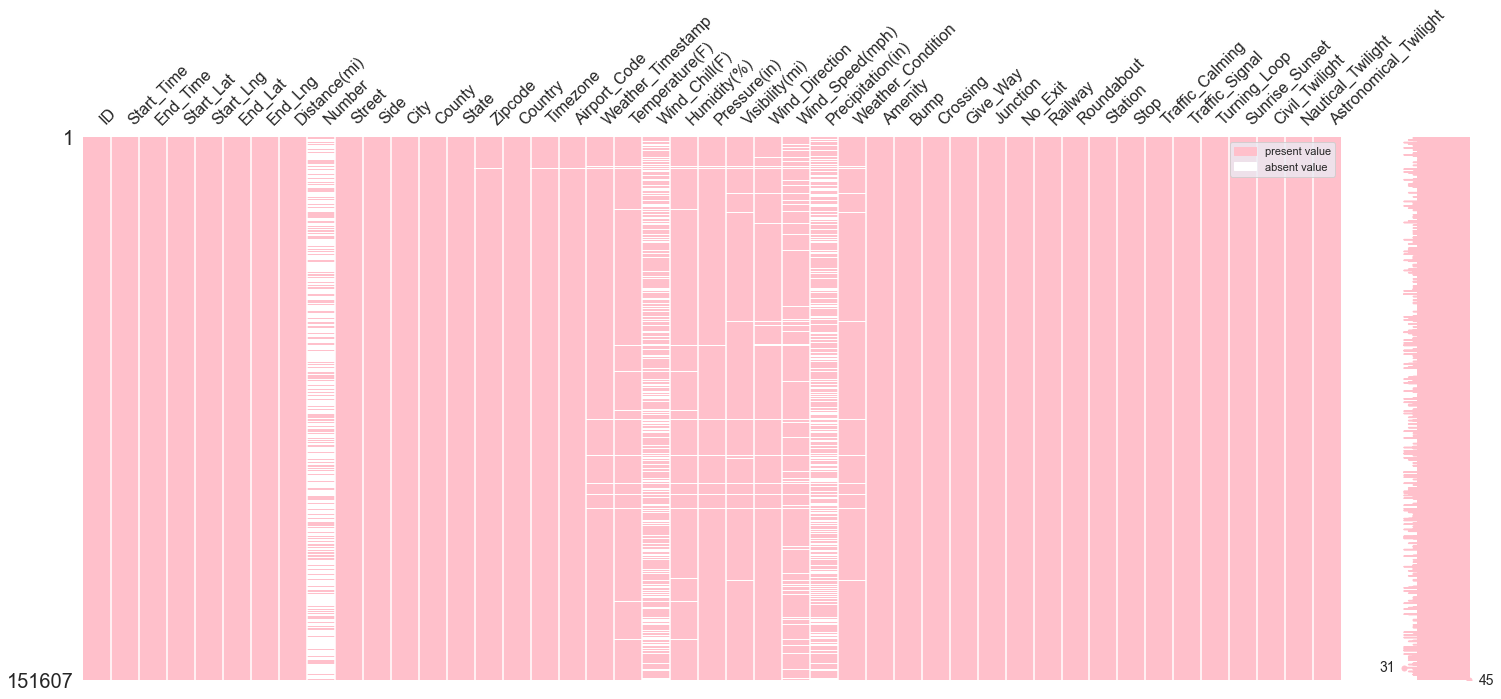

In [6]:
# display missing values in descending
print("Missing values in TRAIN in ascending: \n", missing_percentage(train))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in TEST in ascending: 
                         Total  Percent
Number                 104525    68.94
Precipitation(in)       50853    33.54
Wind_Chill(F)           44908    29.62
Wind_Speed(mph)         12895     8.51
Humidity(%)              4584     3.02
Visibility(mi)           4456     2.94
Weather_Condition        4433     2.92
Temperature(F)           4345     2.87
Wind_Direction           4195     2.77
Pressure(in)             3638     2.40
Weather_Timestamp        3013     1.99
Airport_Code              431     0.28
Timezone                  245     0.16
Zipcode                    82     0.05
Sunrise_Sunset              3      NaN
Civil_Twilight              3      NaN
Nautical_Twilight           3      NaN
Astronomical_Twilight       3      NaN
City                        3      NaN


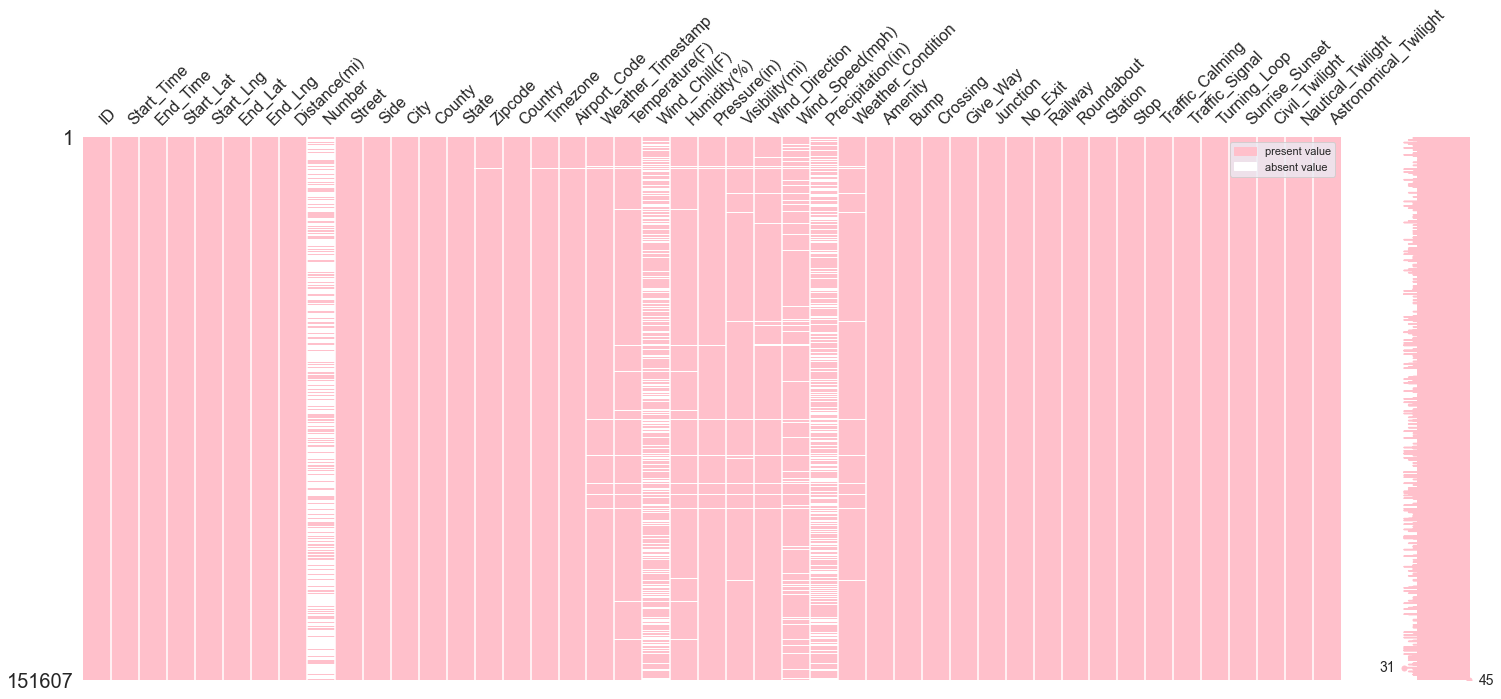

In [7]:
# display missing values in descending
print("Missing values in TEST in ascending: \n", missing_percentage(test))

# visualize where the missing values are located
msno.matrix(test, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

Missing values in VALIDATION in ascending: 
                         Total  Percent
Number                 104815    69.14
Precipitation(in)       51332    33.86
Wind_Chill(F)           45147    29.78
Wind_Speed(mph)         12977     8.56
Humidity(%)              4545     3.00
Visibility(mi)           4467     2.95
Weather_Condition        4443     2.93
Temperature(F)           4312     2.84
Wind_Direction           4203     2.77
Pressure(in)             3641     2.40
Weather_Timestamp        3050     2.01
Airport_Code              428     0.28
Timezone                  240     0.16
Zipcode                    99     0.07
Sunrise_Sunset             13     0.01
Civil_Twilight             13     0.01
Nautical_Twilight          13     0.01
Astronomical_Twilight      13     0.01
City                       13     0.01


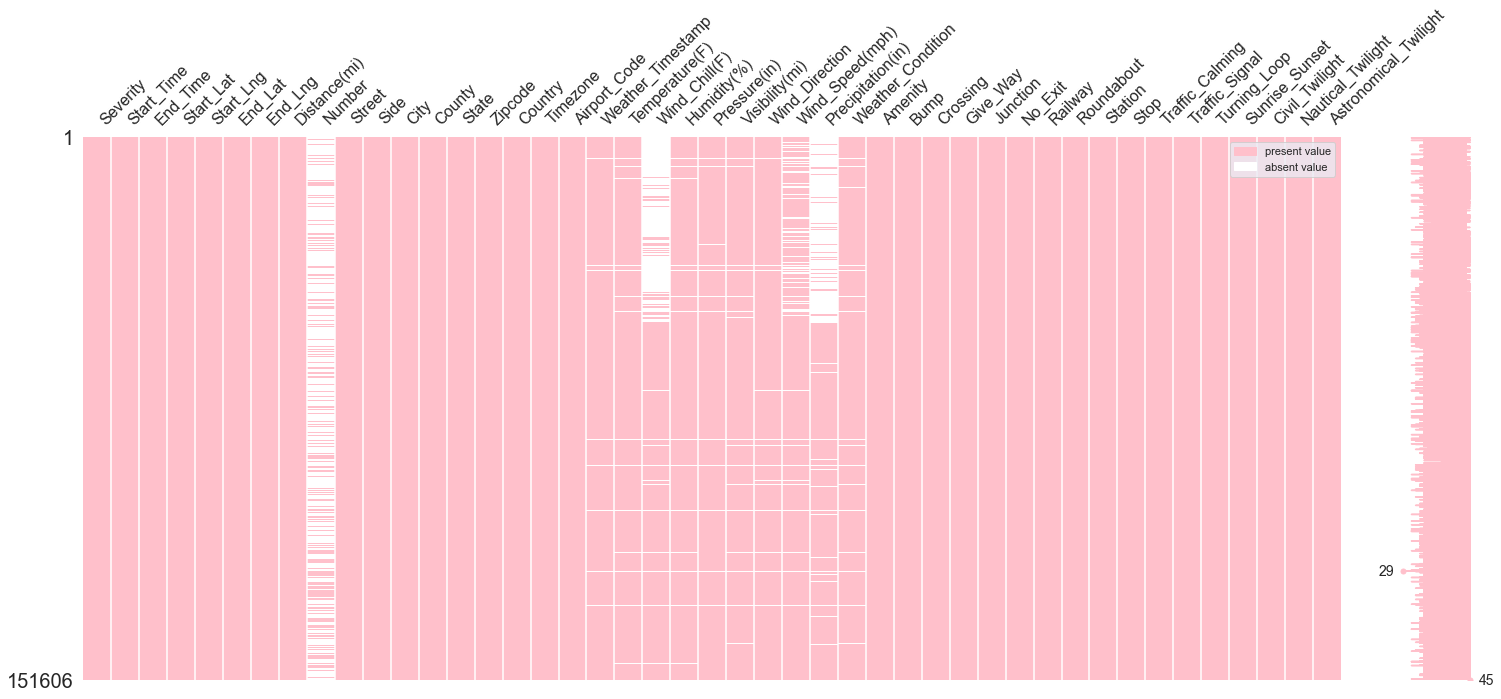

In [8]:
# display missing values in descending
print("Missing values in VALIDATION in ascending: \n", missing_percentage(validation))

# visualize where the missing values are located
msno.matrix(validation, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>
+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random!
+ There is a strong correlation the strong correlation between `Number`, `Wind Chill(F)` and `Precipitation(in)`.  
+ I'm going to delete any missing column that has IS COMPLETELY AT RANDOM (MCAR) AND the number of missing values is VERY SMALL


Sunrise_Sunset                3

Civil_Twilight                3

Nautical_Twilight             3

Astronomical_Twilight         3

City                          3
<hr>

<a id="2.3.2"></a>
### 2.3.2 Drop missing values pairwise for train and validation set by deleting their rows

In [9]:
# Pairwise delete the rows 
train.dropna(subset=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City'],
             how='any', inplace=True)
validation.dropna(subset=['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'City'],
                  how='any', inplace=True)

<a id="2.3.3"></a>
### 2.3.3 Drop missing values listwise for all the datasets by deleting their columns

+ `Street` Shows the street number in address field which too specific for the prediction and have too much missing values (>60%).

+ `Country` shows the dataset is about accidents happening in the United States.

In [10]:
print("Number of categories in Country column - TRAIN:", train.Country.nunique())
print("Categories in TRAIN:", train.Country.unique())

print("Number of categories in Country column - TEST:", test.Country.nunique())
print("Categories in TEST:", test.Country.unique())

print("Number of categories in Country column - VALIDATION:", validation.Country.nunique())
print("Categories in VALIDATION:", validation.Country.unique())

Number of categories in Country column - TRAIN: 1
Categories in TRAIN: <StringArray>
['US']
Length: 1, dtype: string
Number of categories in Country column - TEST: 1
Categories in TEST: <StringArray>
['US']
Length: 1, dtype: string
Number of categories in Country column - VALIDATION: 1
Categories in VALIDATION: <StringArray>
['US']
Length: 1, dtype: string


In [11]:
print("Number of categories:", train.Turning_Loop.nunique())
print("Categories:", train.Turning_Loop.unique())

Number of categories: 1
Categories: <BooleanArray>
[False]
Length: 1, dtype: boolean


In [12]:
print(f'NUMBER OF CATEGORIES: {train.Street.nunique()}; \nUNIQUE NAMES OF THE CATEGORIES {train.Street.unique()}\n')


NUMBER OF CATEGORIES: 53871; 
UNIQUE NAMES OF THE CATEGORIES <StringArray>
[          'US-50 E',            'I-77 N',    'State Route 32',
       'Outerbelt W',           'US-33 S',       'North Fwy N',
            'I-75 S',            'I-70 E',           'I-675 S',
     ' Long Lake Ln',
 ...
 'Dan Brown Hill Rd',   ' Terry Park Cir', ' Hayne Stretch Rd',
    ' Radebaugh Way', ' Marshall Park Ln',    'Point Lobos St',
     'Jennie Lee Ln',     'Sangertown Sq',     ' Kendrick Ave',
      'NFS Road 104']
Length: 53871, dtype: string



### ----------> OBSERVAITON:

<hr>

+ We can remove the country and turning loop column as the data is based on single country and turning loop And we can also check if there are any other columns with single categorical value that can be dropped

+  Number has 64% of missing data and can be removed as this would not be used for analysis. 

+ Street has 53871 unique values which is not meaningful for my further model prediction

+ Precipitation(in) has 57% of missing data but this one is a key factor for rain/snow so can be recovered with these feature columns but the preciptation must be changed to categorical value. + Wind_Chill(F) the percentage of missing data is 53, considering the fact of this feature, this can also be removed.


+  Augmenting with Reverse Geo-Coding.Raw traffic accidentrecords contain only GPS data. The data collection process perform reverse geocoding to translate GPS coordinates toaddresses, each consisting of astreet number,street name,relativeside (left/right),city,county,state,country, andzip-code. This processis same aspoint-wise map-matching.

+ Timezone, Zipcode, Country, City, State, Street, County, Side all have purpose of pointing to the location

+ An US city can have 2 timezones

+ One Postal Code can have 2 cities, ZIP codes do not generally correspond to city and town boundaries, so having a ZIP code associated with a city is no guarantee that an address is actually located in that city. Second of all, ZIP codes actually have multiple names associated with them.

+ However, Timezone, Zipcode have a lot of NA -> drop since I can use columns with similar meaning for further analysis
+ All the values in the Country column is US means this has constant value. All data points were collected at a location
+ `Street` Shows the street number in address field which too specific for the prediction and have too much missing values (>60%).

+ `Country` shows the dataset is about accidents happening in the United States.
<hr>

In [13]:
# drop listwise columns for all datasets
train = train.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)
test = test.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)
validation = validation.drop(labels=['Street', 'Turning_Loop', 'Country', 'Number', 'Wind_Chill(F)'], axis=1)

<a id="2.3.4"></a>
### 2.3.4 [Interpolate() - Nearest Value imputation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

+ I've sorted all dataframes by their `End_Time`, now I only need to fill na based on the corresponding `Weather_Timestamp` in the previous row. 

+ I could not sort the test data set by the `End_time` since it would mess up my Kaggle result. Moreover, `Weather_Timestamp` approximately equal `Start_Time` and `Start_Time` has no missing value, I'll fill na in `Weather_Timestamp` with `Start_Time` in the test dataset 

In [14]:
# Interpolate the NaNs with nearest value for Weather_Timestamp column
train.Weather_Timestamp.interpolate(method='ffill', inplace=True)
test['Weather_Timestamp'] = test['Weather_Timestamp'].fillna(test['Start_Time'])
validation.Weather_Timestamp.interpolate(method='ffill', inplace=True)

<a id="2.3.5"></a>
### 2.3.5 Median & Frequent Categorical Imputation for Weather Continuous features

Continuous weather features with missing values:

1. Temperature(F)

2. Humidity(%)

3. Pressure(in)

4. Visibility(mi)

5. Wind_Speed(mph)

`apply` + `pd.to_numeric` + `mask` + `fillna`

**According to the "A Countrywide Traffic Accident Dataset":** 
"Weather Underground API to obtain weather information for each accident. Raw weather data was collected from 1,977 **weather stations located in airports** all around the United States."

+ Grouped by location and time. 'Airport_Code' is selected as location feature because the sources of weather data are airport-based weather stations. 

+ Then the data will be grouped by 'Start_Month' rather than 'Start_Hour' because using the former is computationally cheaper and remains less missing values. Finally, missing values will be replaced by median value of each group.

In [15]:
train.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [16]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

def get_hours(df, column):
    return df[column].apply(lambda date: date[11:13])


# TRAIN
train['Start_Time_Month'] = get_months(train, 'Start_Time')
train['Start_Time_Year'] = get_years(train, 'Start_Time')
train['Start_Time_Hour'] = get_hours(train, 'Start_Time')

train['End_Time_Month'] = get_months(train, 'End_Time')
train['End_Time_Year'] = get_years(train, 'End_Time')
train['End_Time_Hour'] = get_hours(train, 'End_Time')

train['Weather_Timestamp_Month'] = get_months(train, 'Weather_Timestamp')
train['Weather_Timestamp_Year'] = get_years(train, 'Weather_Timestamp')
train['Weather_Time_Hour'] = get_hours(train, 'Weather_Timestamp')

# TEST
test['Start_Time_Month'] = get_months(test, 'Start_Time')
test['Start_Time_Year'] = get_years(test, 'Start_Time')
test['Start_Time_Hour'] = get_hours(test, 'Start_Time')

test['End_Time_Month'] = get_months(test, 'End_Time')
test['End_Time_Year'] = get_years(test, 'End_Time')
test['End_Time_Hour'] = get_hours(test, 'End_Time')

test['Weather_Timestamp_Month'] = get_months(test, 'Weather_Timestamp')
test['Weather_Timestamp_Year'] = get_years(test, 'Weather_Timestamp')
test['Weather_Time_Hour'] = get_hours(test, 'Weather_Timestamp')

# VALIDATION
validation['Start_Time_Month'] = get_months(validation, 'Start_Time')
validation['Start_Time_Year'] = get_years(validation, 'Start_Time')
validation['Start_Time_Hour'] = get_hours(validation, 'Start_Time')

validation['End_Time_Month'] = get_months(validation, 'End_Time')
validation['End_Time_Year'] = get_years(validation, 'End_Time')
validation['End_Time_Hour'] = get_hours(validation, 'End_Time')

validation['Weather_Timestamp_Month'] = get_months(validation, 'Weather_Timestamp')
validation['Weather_Timestamp_Year'] = get_years(validation, 'Weather_Timestamp')
validation['Weather_Time_Hour'] = get_hours(validation, 'Weather_Timestamp')


# Drop original colums
train = train.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)
test = test.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)
validation = validation.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [17]:
train.head(3)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,Start_Time_Hour,End_Time_Month,End_Time_Year,End_Time_Hour,Weather_Timestamp_Month,Weather_Timestamp_Year,Weather_Time_Hour
377127,2,39.10148,-84.52341,39.09841,-84.52241,0.219,R,Cincinnati,Hamilton,OH,45202,US/Eastern,KLUK,36.0,97,29.7,10.0,Calm,<NA>,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,Night,Night,Night,Day,02,2016,06,02,2016,12,02,2016,05
108963,2,41.06213,-81.53784,41.06217,-81.53547,0.123,R,Akron,Summit,OH,44311,US/Eastern,KAKR,39.0,55,29.65,10.0,Calm,<NA>,<NA>,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day,02,2016,06,02,2016,12,02,2016,06
410084,2,39.06324,-84.03243,39.06731,-84.05851,1.427,R,Williamsburg,Clermont,OH,45176,US/Eastern,KI69,35.6,100,29.66,10.0,WSW,8.1,<NA>,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,Day,Day,Day,Day,02,2016,08,02,2016,14,02,2016,08


In [18]:
missing_percentage(train)

,Total,Percent
Precipitation(in),153413,33.73
Wind_Speed(mph),38716,8.51
Humidity(%),13670,3.01
Visibility(mi),13276,2.92
Weather_Condition,13196,2.90
Temperature(F),12910,2.84
Wind_Direction,12570,2.76
Pressure(in),10865,2.39
Airport_Code,1294,0.28
Timezone,690,0.15


In [19]:
%time
from collections import Counter

def fill_mode_wind_direction(df):
    # grouping data to fill NAs with majority value
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month', 'Start_Time_Hour'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 1 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))
    
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Year', 'Start_Time_Month'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 2 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))
    
    df['Wind_Direction'] = df.groupby(['Airport_Code', 'Start_Time_Month'])['Wind_Direction'].apply(
        lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull()) == False else x)
    print('Wind_Direction' + " fill type 3 for Nan : " + df['Wind_Direction'].isnull().sum().astype(str))


fill_mode_wind_direction(train)
fill_mode_wind_direction(test)
fill_mode_wind_direction(validation)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.29 µs
Wind_Direction fill type 1 for Nan : 10311
Wind_Direction fill type 2 for Nan : 8585
Wind_Direction fill type 3 for Nan : 7758
Wind_Direction fill type 1 for Nan : 3684
Wind_Direction fill type 2 for Nan : 2968
Wind_Direction fill type 3 for Nan : 2652
Wind_Direction fill type 1 for Nan : 3644
Wind_Direction fill type 2 for Nan : 2945
Wind_Direction fill type 3 for Nan : 2678


### -------------> OBSERVATION
<hr>
There still are some missing values but much less. Impute median by these features for the sake of simplicity.
<hr>

<a id="2.3.6"></a>
### 2.3.6 Impute Median and Mode for the rest- assume that there is random order of missing values 

In [20]:
# select numeric columns
numeric = train.select_dtypes(include=[np.number])
train_numeric = numeric.columns.tolist()

numeric = validation.select_dtypes(include=[np.number])
validation_numeric = numeric.columns.tolist()

numeric = test.select_dtypes(include=[np.number])
test_numeric = numeric.columns.tolist()

def impute_median_num_col(df, numeric_col):
    # Imputes mode to NAN to the rest of categorical columns 
    for column in numeric_col:
        df[column].fillna(df[column].median(), inplace=True)

impute_median_num_col(train, train_numeric)
impute_median_num_col(test, test_numeric)
impute_median_num_col(validation, validation_numeric)



# select non-numeric columns
train_string = train.select_dtypes(include='string')
test_string = test.select_dtypes(include='string')
validation_string = validation.select_dtypes(include='string')


def impute_mode_num_col(df, string_col):
    # Imputes mode to NAN to the rest of categorical columns 
    for column in string_col:
        df[column].fillna(df[column].mode()[0], inplace=True)

impute_mode_num_col(train, train_string)
impute_mode_num_col(test, test_string)
impute_mode_num_col(validation, validation_string)

In [21]:
# display missing values in descending
missing_percentage(train)

,Total,Percent


<br><br>
<a id="2.4"></a>
# 2.4 Shorten and Simplify categories 

<a id="2.4.1"></a>
### 2.4.1 Time-series columns - break them down into hour, minute, and weekday 

### Number of accidents for hour

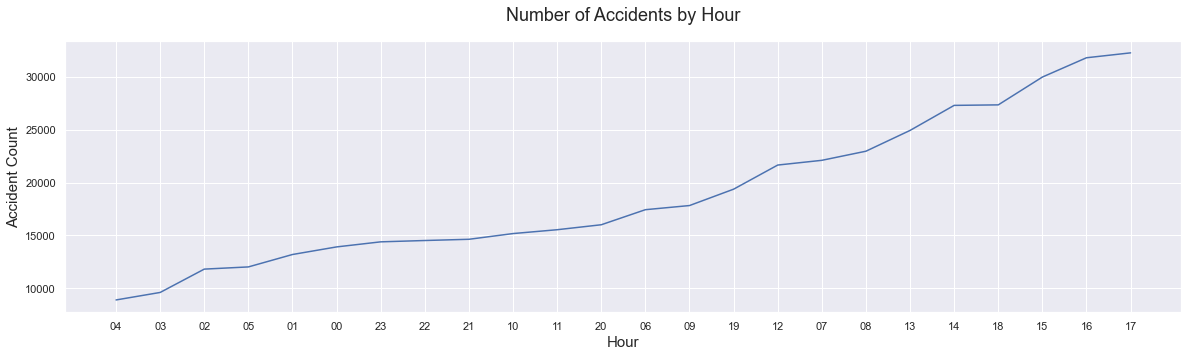

In [22]:
# get the accident count for each hour
df_hour = train['Start_Time_Hour'].value_counts().to_frame().reset_index().sort_values('Start_Time_Hour')
df_hour.columns = ['Hour', 'Counts']

# set fig size
plt.figure(figsize=(20, 5))
#set grid style
sns.set_style("darkgrid")
# crete a line plot for accident count for each hours as a time series
sns.lineplot(x='Hour', y='Counts', data=df_hour)
# set label, ticks and title
plt.xticks(df_hour['Hour'])
plt.ylabel('Accident Count', size=15)
plt.xlabel('Hour', size=15)
plt.title('Number of Accidents by Hour', size=18, y=1.05)
# show graph
plt.show()

### Number of accidents for Month

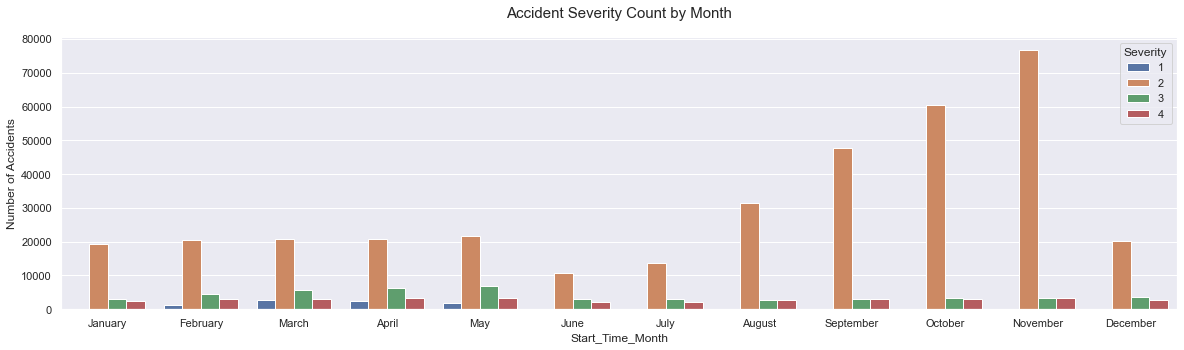

In [23]:
# import calendar for getting the month and week names
import calendar

# define the plot size
plt.figure(figsize=(20, 5))

# create count plot for severity for each month
sns.countplot(x='Start_Time_Month', hue='Severity', data=train)

# set itle, labels and ticks
plt.title('Accident Severity Count by Month', size=15, y=1.05)
plt.ylabel("Number of Accidents")
plt.xticks(np.arange(0, 12, 1), calendar.month_name[1:13])
# plt.yticks(np.linspace(25000,250000,6))

#show plot
plt.show()

### Number of accidents for Year

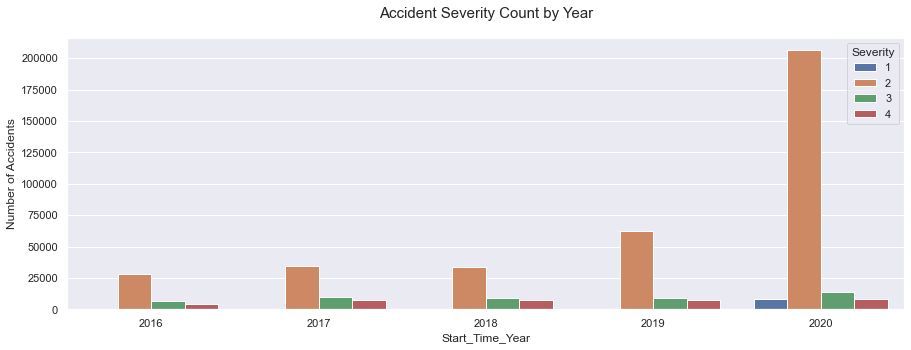

In [24]:
# define the figure size
plt.figure(figsize=(15, 5))

# create count plot for severity for each year
sns.countplot(x='Start_Time_Year', hue='Severity', data=train)

# set the ticks, labels and title
plt.title('Accident Severity Count by Year', size=15, y=1.05)
plt.ylabel("Number of Accidents")

# show plot
plt.show()

<a id="2.4.2"></a>
### 2.4.2 Shorten & Simplify the Wind Direction

In [25]:
train.Wind_Direction.value_counts()

CALM        70228
Calm        23944
WNW         23497
NW          22910
W           21961
SSW         20986
WSW         20824
NNW         20557
S           20457
SW          19755
SSE         19628
SE          16648
N           16319
E           15810
ESE         15571
ENE         15298
NE          14702
NNE         14056
VAR         12326
West        12240
South       12144
North       10753
East         7239
Variable     6943
Name: Wind_Direction, dtype: Int64

In [26]:
def simplify_wind_direction(df):
    df.loc[df['Wind_Direction'] == 'Calm', 'Wind_Direction'] = 'CALM'
    df.loc[(df['Wind_Direction'] == 'West') | (df['Wind_Direction'] == 'WSW') | (
            df['Wind_Direction'] == 'WNW'), 'Wind_Direction'] = 'W'
    df.loc[(df['Wind_Direction'] == 'South') | (df['Wind_Direction'] == 'SSW') | (
            df['Wind_Direction'] == 'SSE'), 'Wind_Direction'] = 'S'
    df.loc[(df['Wind_Direction'] == 'North') | (df['Wind_Direction'] == 'NNW') | (
            df['Wind_Direction'] == 'NNE'), 'Wind_Direction'] = 'N'
    df.loc[(df['Wind_Direction'] == 'East') | (df['Wind_Direction'] == 'ESE') | (
            df['Wind_Direction'] == 'ENE'), 'Wind_Direction'] = 'E'
    df.loc[df['Wind_Direction'] == 'Variable', 'Wind_Direction'] = 'VAR'
    print("Wind Direction after simplification: ", df['Wind_Direction'].unique())


simplify_wind_direction(train)
simplify_wind_direction(test)
simplify_wind_direction(validation)

Wind Direction after simplification:  <StringArray>
['CALM', 'W', 'SW', 'NW', 'N', 'S', 'E', 'VAR', 'SE', 'NE']
Length: 10, dtype: string
Wind Direction after simplification:  <StringArray>
['CALM', 'W', 'E', 'S', 'NW', 'N', 'SW', 'NE', 'SE', 'VAR']
Length: 10, dtype: string
Wind Direction after simplification:  <StringArray>
['W', 'CALM', 'N', 'NW', 'SE', 'S', 'E', 'SW', 'NE', 'VAR']
Length: 10, dtype: string


<a id="2.4.3"></a>
### 2.4.3 Shorten ad Simplify the Weather Condition

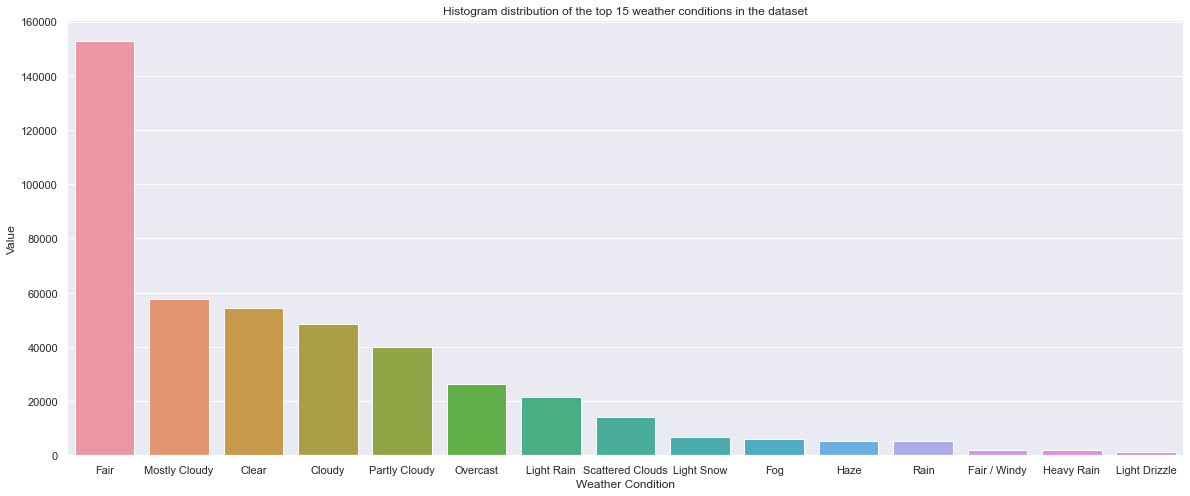

In [27]:
counts = train["Weather_Condition"].value_counts()[:15]
plt.figure(figsize=(20, 8))
plt.title("Histogram distribution of the top 15 weather conditions in the dataset")
sns.barplot(counts.index, counts.values)
plt.xlabel("Weather Condition")
plt.ylabel("Value")
plt.show()

### -----------> OBSERVATION
<hr>
According to Road Weather Management Program, most weather-related crashes happen on wet-pavement and during rainfall. Winter-condition and fog are another two main reasons for weather-related accidents. 

To extract these three weather conditions, we first look at what we have in 'Weather_Condition' Feature.
<hr>

In [28]:
train.Weather_Condition.value_counts()

Fair                            152815
Mostly Cloudy                    57681
Clear                            54287
Cloudy                           48247
Partly Cloudy                    40041
Overcast                         26284
Light Rain                       21610
Scattered Clouds                 14114
Light Snow                        6683
Fog                               5909
Haze                              5288
Rain                              5206
Fair / Windy                      1975
Heavy Rain                        1933
Light Drizzle                     1325
Smoke                             1130
Mostly Cloudy / Windy             1125
Cloudy / Windy                     978
Snow                               831
Partly Cloudy / Windy              638
Light Rain / Windy                 581
T-Storm                            463
Thunder in the Vicinity            386
Wintry Mix                         376
Light Rain with Thunder            350
Thunder                  

In [29]:
def simplify_weather_condition(df):
    df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
    df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
    df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
    df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
    df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
    df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
    df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
    df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
    df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
    df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
    df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = "Unknown"

    print(df["Weather_Condition"].unique())


simplify_weather_condition(train)
simplify_weather_condition(test)
simplify_weather_condition(validation)

train_unique_weather = train["Weather_Condition"].unique()
test_unique_weather = test["Weather_Condition"].unique()
validation_unique_weather = validation["Weather_Condition"].unique()

<StringArray>
[      'Cloudy',         'Snow',        'Clear',         'Rain',
          'Fog', 'Thunderstorm',        'Windy',         'Hail',
        'Smoke',         'Sand',      'Unknown',      'Tornado']
Length: 12, dtype: string
<StringArray>
[       'Clear',       'Cloudy',        'Windy',          'Fog',
         'Sand',         'Snow',         'Rain',        'Smoke',
         'Hail',      'Unknown', 'Thunderstorm']
Length: 11, dtype: string
<StringArray>
[      'Cloudy',         'Snow',        'Clear',         'Rain',
          'Fog',        'Smoke', 'Thunderstorm',         'Hail',
        'Windy',      'Unknown',         'Sand']
Length: 11, dtype: string


<br><br>
<a id="2.5"></a>
# 2.5 Typos
<a id="2.5.1"></a>
### 2.5.1 Check general spelling errors

In [30]:
train_string = train.select_dtypes(include='string')

# Check if spelling errors, shoul clean further if the number of before checking and after checking are different
for col in train_string:
    print(f'Before: {col}: {len(set(train[col]))}; After: {col}: {len(set(train[col].str.title().str.strip()))}')

Before: Side: 2; After: Side: 2
Before: City: 8887; After: City: 8854
Before: County: 1535; After: County: 1522
Before: State: 49; After: State: 49
Before: Zipcode: 83284; After: Zipcode: 83284
Before: Timezone: 4; After: Timezone: 4
Before: Airport_Code: 1884; After: Airport_Code: 1884
Before: Wind_Direction: 10; After: Wind_Direction: 10
Before: Weather_Condition: 12; After: Weather_Condition: 12
Before: Sunrise_Sunset: 2; After: Sunrise_Sunset: 2
Before: Civil_Twilight: 2; After: Civil_Twilight: 2
Before: Nautical_Twilight: 2; After: Nautical_Twilight: 2
Before: Astronomical_Twilight: 2; After: Astronomical_Twilight: 2


### ----------> OBSERVATION
<hr>
Indeed, there are typos in the `Street`, `City`, `County`, `Wind_Direction`. Let's fix it.
<hr>

In [31]:
# Correct the errors
# train.Street = train.Street.str.title().str.strip()
train.City = train.City.str.title().str.strip()
train.County = train.County.str.title().str.strip()
train.Wind_Direction = train.Wind_Direction.str.title().str.strip()

# Correct the errors
# test.Street = test.Street.str.title().str.strip()
test.City = test.City.str.title().str.strip()
test.County = test.County.str.title().str.strip()
test.Wind_Direction = test.Wind_Direction.str.title().str.strip()

# validation.Street = validation.Street.str.title().str.strip()
validation.City = validation.City.str.title().str.strip()
validation.County = validation.County.str.title().str.strip()
validation.Wind_Direction = validation.Wind_Direction.str.title().str.strip()

In [32]:
# Check if spelling errors already fixed
for col in train_string:
    print(f'Before: {col}: {len(set(train[col]))}; After: {col}: {len(set(train[col].str.title().str.strip()))}')

Before: Side: 2; After: Side: 2
Before: City: 8854; After: City: 8854
Before: County: 1522; After: County: 1522
Before: State: 49; After: State: 49
Before: Zipcode: 83284; After: Zipcode: 83284
Before: Timezone: 4; After: Timezone: 4
Before: Airport_Code: 1884; After: Airport_Code: 1884
Before: Wind_Direction: 10; After: Wind_Direction: 10
Before: Weather_Condition: 12; After: Weather_Condition: 12
Before: Sunrise_Sunset: 2; After: Sunrise_Sunset: 2
Before: Civil_Twilight: 2; After: Civil_Twilight: 2
Before: Nautical_Twilight: 2; After: Nautical_Twilight: 2
Before: Astronomical_Twilight: 2; After: Astronomical_Twilight: 2


<a id="2.5.2"></a>
### 2.5.2 Extra-whitespaces
Check whether there are instances of extra whitespaces and trim them in the data 

In [33]:
from function import whitespace_remover

"""
        Remove extra leading and tailing whitespace from the data.
         pass dataframe as a parameter and apply whitespace_remover function on dataframe
"""

whitespace_remover(train)
whitespace_remover(test)
whitespace_remover(validation)

<a id="2.5.3"></a>
### 2.5.3 Lower-case all values in each column

+ Categorical data should have all the uniform formatting style, such as lower case. 
+ I will cast all categorical data to lower case except the test set since I dont want my ID columns to be in lower case to match the ID in Kaggle competition

In [34]:
# Cast all values inside the dataframe (except the columns' name) into lowercase
train = train.applymap(lambda s: s.lower() if type(s) == str else s)
# test = test.applymap(lambda s: s.lower() if type(s) == str else s) // I dont want my ID to be lower case to match the ID in Kaggle competition
validation = validation.applymap(lambda s: s.lower() if type(s) == str else s)

<br><br>
<a id="2.6"></a>
# 2.6 Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
<a id="2.6.1"></a>
### 2.6.1 Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

+ Could not drop duplicated in TEST since I'll use it to compete in Kaggle learboard

In [35]:
# TRAIN
print("Number of rows before drop of duplicates  in TRAIN:", len(train.index))
print("Number of duplicated records in TRAIN: ", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in TRAIN:", len(train.index), "\n\n")


# VALIDATION
print("Number of rows before drop of duplicates in VALIDATION:", len(validation.index))
print("Number of duplicated records in VALIDATION: ", validation.duplicated().sum())
validation.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in VALIDATION:", len(validation.index))

Number of rows before drop of duplicates  in TRAIN: 454796
Number of duplicated records in TRAIN:  15679
Number of rows after drop of duplicates in TRAIN: 439117 


Number of rows before drop of duplicates in VALIDATION: 151593
Number of duplicated records in VALIDATION:  1871
Number of rows after drop of duplicates in VALIDATION: 149722


<a id="2.6.2"></a>
### 2.6.2 Impossible values

In [36]:
train.describe().round(2)

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00,439117.00
mean,2.24,36.93,-98.73,36.93,-98.73,0.59,59.69,64.69,29.57,9.15,7.59,0.01
std,0.61,5.16,18.48,5.16,18.48,1.63,18.04,22.96,1.00,2.87,5.25,0.10
min,1.00,24.57,-124.50,24.57,-124.50,0.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.86,-118.22,33.86,-118.22,0.00,48.00,49.00,29.47,10.00,4.60,0.00
50%,2.00,37.35,-94.53,37.36,-94.53,0.18,61.00,68.00,29.88,10.00,7.00,0.00
75%,2.00,40.73,-80.94,40.73,-80.94,0.59,73.00,84.00,30.04,10.00,10.00,0.00
max,4.00,49.00,-67.40,49.00,-67.40,150.14,168.80,100.00,38.94,120.00,518.00,24.00


### -----> OSERVATION

<hr>

The **minimum value for "Pressure(in)", "Visibility(mi)" is 0**, meaning that some records are missing them and replaced them by putting zeros. For this reason, I'm going to drop the records for these two columns.
<hr>

In [37]:
train = train[train["Pressure(in)"] != 0]
train = train[train["Visibility(mi)"] != 0]

# Drop rows that have Pressure and Visibility equal and below 0
validation = validation[validation["Pressure(in)"] != 0]
validation = validation[validation["Visibility(mi)"] != 0]


print("TRAIN DATASET: ")
print(train[["Pressure(in)", "Visibility(mi)"]].describe().round(2))

print("VALIDATION DATASET: ")
print(validation[["Pressure(in)", "Visibility(mi)"]].describe().round(2))

TRAIN DATASET: 
       Pressure(in)  Visibility(mi)
count     438700.00       438700.00
mean          29.57            9.16
std            1.00            2.86
min            0.30            0.06
25%           29.47           10.00
50%           29.88           10.00
75%           30.04           10.00
max           38.94          120.00
VALIDATION DATASET: 
       Pressure(in)  Visibility(mi)
count     149582.00       149582.00
mean          29.57            9.16
std            1.00            2.89
min           19.89            0.06
25%           29.47           10.00
50%           29.88           10.00
75%           30.04           10.00
max           58.04          140.00


<br><br>
<a id="2.7"></a>
# 2.7 Extra exploration and visualization
<a id="2.7.1"></a>
### 2.7.1 Medium distance by severity
Let's now analyze the medium distance of an accident based on its severity.

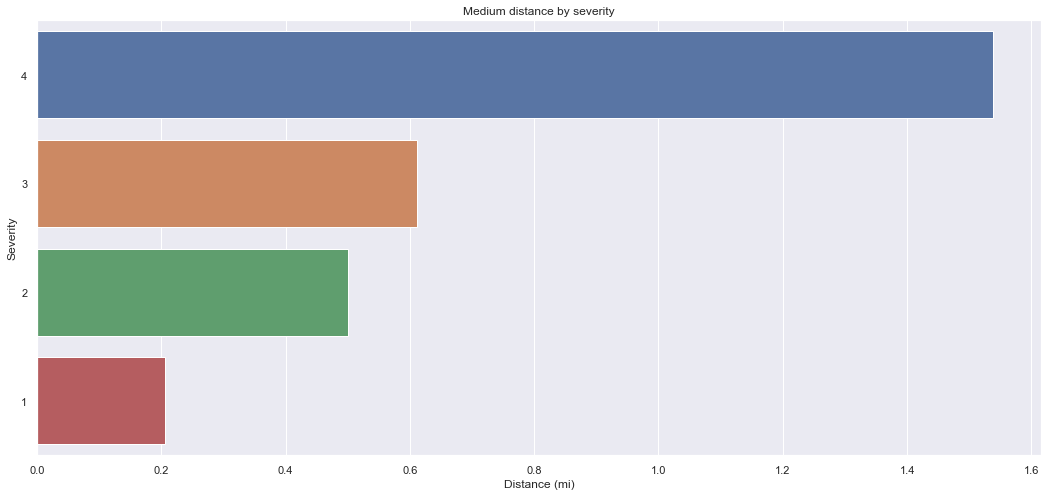

In [38]:
severity_distance = train.groupby("Severity").mean()["Distance(mi)"].sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Medium distance by severity")
sns.barplot(severity_distance.values, severity_distance.index, orient="h", order=severity_distance.index)
plt.xlabel("Distance (mi)")
plt.show()

### ------------> OBSERVATION

<hr>
In this graph we can see that the distance of the accident is more or less proportional to the severity, and in fact accidents with severity 4 have the longest distance.
<hr>

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.05 µs


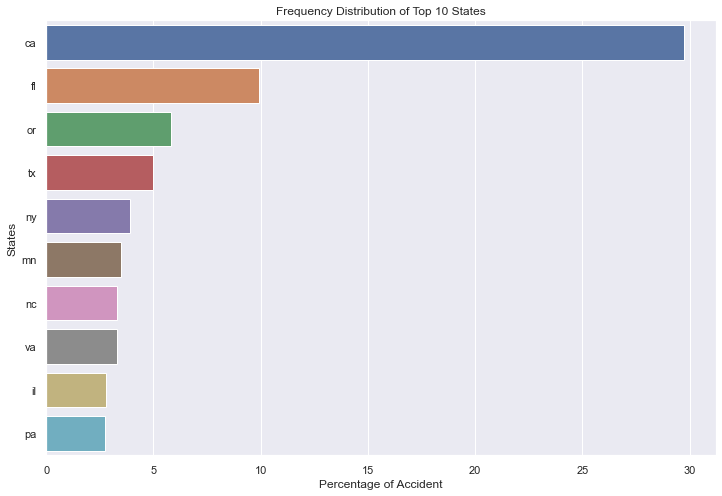

In [39]:
%time
# visualize top 10 states having the most accidents
state_percentage = train['State'].value_counts() * 100 / len(train)

# state_count
plt.figure(figsize=(12, 8))
sns.barplot(state_percentage.values[:10], state_percentage.index[:10])
plt.title('Frequency Distribution of Top 10 States')

plt.ylabel('States', fontsize=12)
plt.xlabel('Percentage of Accident', fontsize=12)
plt.show()

### ----------> OBSERVATION
<hr>
As we can clearly see, the state having the most number of accidents is California followed by Florida.
<hr>

<a id="2.7.2"></a>
### 2.7.2 Longtitude and Latitude
As, we can see the density of points is more at the eastern and western coasts as compared to the middle of the country

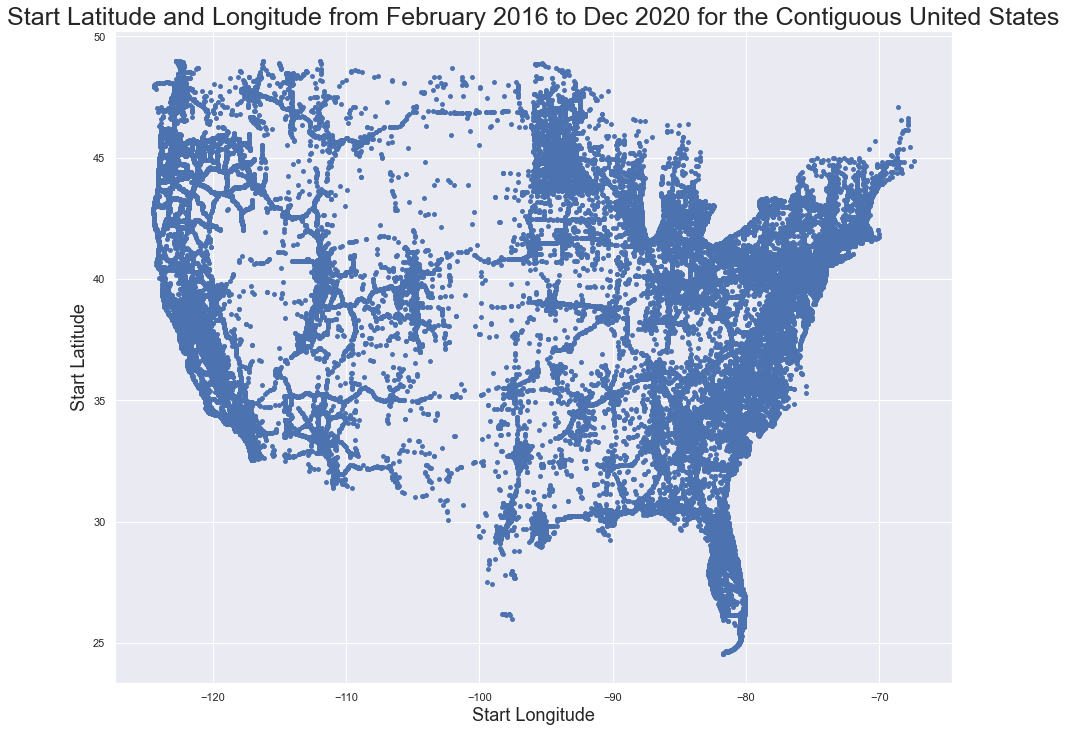

In [40]:
from matplotlib import pyplot as plt

# Make scatter for Latitude and Longitude
plt.figure(figsize=(15, 12))
plt.scatter(x=train.Start_Lng, y=train.Start_Lat, s=15)
plt.title("Start Latitude and Longitude from February 2016 to Dec 2020 for the Contiguous United States", fontsize=25)
plt.xlabel("Start Longitude", fontsize=18)
plt.ylabel("Start Latitude", fontsize=18)
plt.show()

<a id="2.7.3"></a>
### 2.7.3 Most frequent street type of an accident with severity 
We are going to compute the most frequent words in the description column of the accidents with a value of severity equal to 4, using some stopwords from the english language.

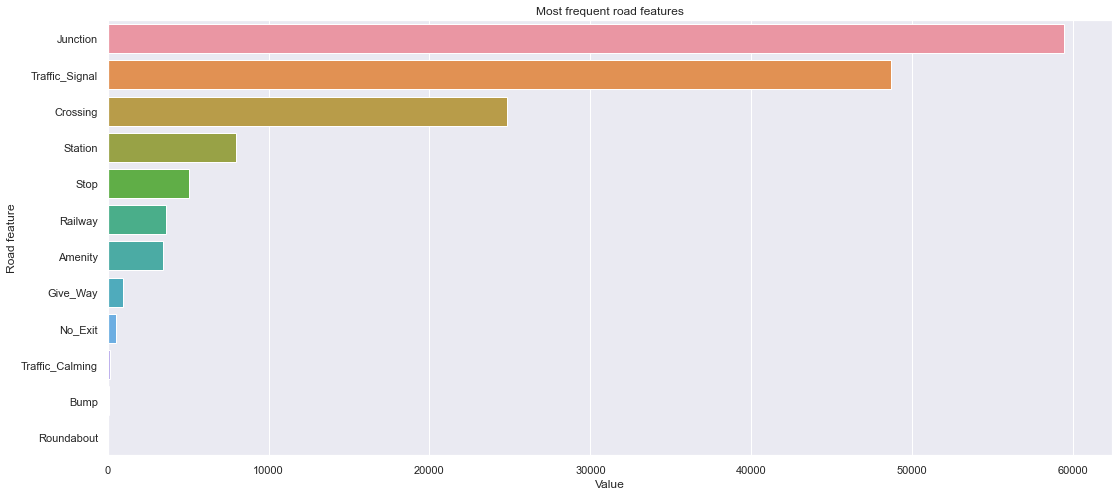

In [41]:
road_features = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station",
                 "Stop", "Traffic_Calming", "Traffic_Signal"]
data = train[road_features].sum().sort_values(ascending=False)

plt.figure(figsize=(18, 8))
plt.title("Most frequent road features")
sns.barplot(data.values, data.index, orient="h")
plt.xlabel("Value")
plt.ylabel("Road feature")
plt.show()

### ---------> OBSERVATION

<hr>

+ As we can see, most of the accidents occured near a traffic signal, expecially where a junction or a crossing was present.
+ The fourth most common road feature, instead, was the presence of a nearby station, probably because of the high presence of vehicles.

<hr>

<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Conclusion</strong></h1>

+ The number of unique cities where accidents have taken place in USA: 10658
+ The Top 5 cities of USA with maximum number of accidents in 4 years are: Los Angeles, Miami, Charlotte, Houston, Dallas
+ The percentage of cities have more than 1000 accidents in a year is: 2.3552594538800786%
+ 1167 cities of USA have had only accident in 4 years!
+ The maximum number of accidents have taken place at around 4-5P.M. which can be a result of the fact that most people are travelling back to their homes after work which causes a rush hour.
+ Suprisingly, maximum number of accidents occured on a Thursday and not on a weekend. This means that maybe, not a lot of people travel on the weekends
+ Los Angeles is the city with highest number of accidents in USA (2016-2020)
+ Miami is the city with 2nd highest number of accidents in USA (2016-2020)
+ California is the State with highest number of accidents in USA (2016-2020)
+ Florida is the state with 2nd highest number of accidents in USA (2016-2020)
+ In 80% Cases of road accidents, the impact on the traffic was Moderate - 2
+ In 10% Cases of road accidents, the impact on the traffic was Severe - 3

### WRITING CLEANED DATA BACK TO FILES
After completing your analysis and adding new columns, I write the results back to a file and get that data to visualize on Dash App. Otherwise, the data will be lost when the Jupyter Lab shuts down.

In [42]:
# # To write the data from the data frame into a file, use the to_csv function.
# train.to_csv('cosc2789-2021/cleaned_train.csv', index=False)
# test.to_csv('cosc2789-2021/cleaned_test.csv', index=False)
# validation.to_csv('cosc2789-2021/cleaned_validation.csv', index=False)
# print("Cleaned data was successfully saved!")

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Feature Engineering</strong></h1>

# Missing Values

In [43]:
print("Total missing values in TRAIN:", train.isna().sum().sum())
print("Total missing values in TEST:", test.isna().sum().sum())
print("Total missing values in VALIDATION:", validation.isna().sum().sum())

Total missing values in TRAIN: 0
Total missing values in TEST: 0
Total missing values in VALIDATION: 0


In [44]:
missing_percentage(train)

,Total,Percent


In [45]:
missing_percentage(test)

,Total,Percent


In [46]:
missing_percentage(validation)

,Total,Percent


### 16. Data Correlation

###### 4. Quantify the association of features and accidents
We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).

To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

0.2 = weak
0.5 = medium
0.8 = strong
0.9 = very strong

In [47]:
print (f"Train has {train.shape[0]} rows and {train.shape[1]} columns")
print (f"Test has {test.shape[0]} rows and {test.shape[1]} columns")
print (f"Validation has {validation.shape[0]} rows and {validation.shape[1]} columns")

Train has 438700 rows and 46 columns
Test has 151607 rows and 46 columns
Validation has 149582 rows and 46 columns


If you want to know more about why we are splitting dataset's into train and test, please check out this [kernel](https://www.kaggle.com/masumrumi/a-statistical-analysis-ml-workflow-of-titanic).

In [48]:
# gives us statistical info about the numerical variables. 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,438700.0,2.243615,0.612126,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,438700.0,36.924992,5.156410,24.570222,33.858560,37.354780,40.732080,49.000560
Start_Lng,438700.0,-98.719154,18.477496,-124.497567,-118.214156,-94.525898,-80.940801,-67.403551
End_Lat,438700.0,36.925070,5.156403,24.570110,33.858335,37.354760,40.732111,49.000760
End_Lng,438700.0,-98.719007,18.477345,-124.497478,-118.214103,-94.525877,-80.940395,-67.403550
Distance(mi),438700.0,0.586301,1.630518,0.000000,0.000000,0.178000,0.593000,150.138000
Temperature(F),438700.0,59.702897,18.043495,-89.000000,48.000000,61.000000,73.000000,168.800000
Humidity(%),438700.0,64.663488,22.951424,1.000000,49.000000,68.000000,84.000000,100.000000
Pressure(in),438700.0,29.568323,0.999707,0.300000,29.470000,29.880000,30.040000,38.940000
Visibility(mi),438700.0,9.161630,2.861522,0.060000,10.000000,10.000000,10.000000,120.000000


In [49]:
## Gives us information about the features. 
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438700 entries, 377127 to 391941
Data columns (total 46 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Severity                 438700 non-null  int64  
 1   Start_Lat                438700 non-null  float64
 2   Start_Lng                438700 non-null  float64
 3   End_Lat                  438700 non-null  float64
 4   End_Lng                  438700 non-null  float64
 5   Distance(mi)             438700 non-null  float64
 6   Side                     438700 non-null  object 
 7   City                     438700 non-null  object 
 8   County                   438700 non-null  object 
 9   State                    438700 non-null  object 
 10  Zipcode                  438700 non-null  object 
 11  Timezone                 438700 non-null  object 
 12  Airport_Code             438700 non-null  object 
 13  Temperature(F)           438700 non-null  float64
 14 

# Observation
* There are multiple types of features. 
* Some features have missing values. 
* Most of the features are object( includes string values in the variable).

I want to focus on the target variable which is **Severity.** Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. This is one of the assumptions of multiple linear regression. I will explain more on this later.

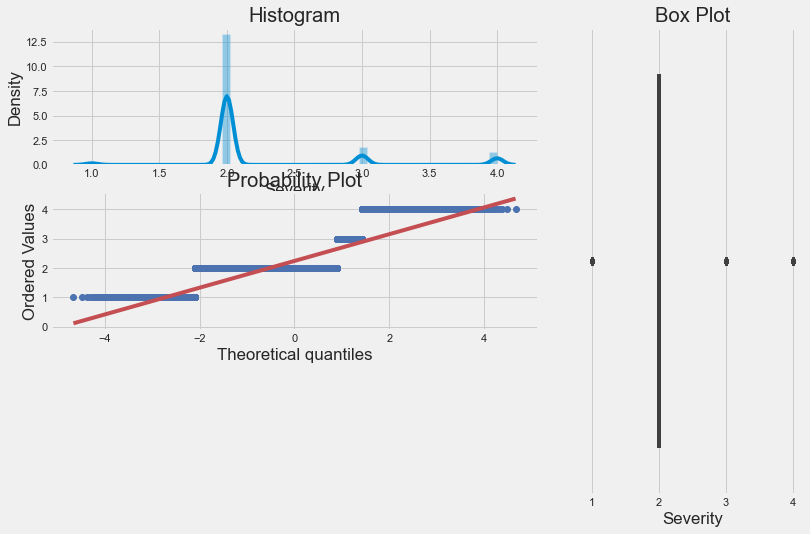

In [50]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'Severity')

These **three** charts above can tell us a lot about our target variable.
* Our target variable, **Severity** is not normally distributed.
* Our target variable is right-skewed. 
* There are multiple outliers in the variable.


**P.S.** 
* If you want to find out more about how to customize charts, try [this](https://matplotlib.org/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py) link. 
* If you are learning about Q-Q-plots for the first time. checkout [this](https://www.youtube.com/watch?v=smJBsZ4YQZw) video. 
* You can also check out [this](https://www.youtube.com/watch?v=9IcaQwQkE9I) one if you have some extra time. 

Let's find out how the `Severity` is distributed.

In [51]:
#skewness and kurtosis
print("Skewness: " + str(train['Severity'].skew()))
print("Kurtosis: " + str(train['Severity'].kurt()))

Skewness: 1.8136105304306374
Kurtosis: 2.79122020392118


It looks like there are quite a bit Skewness and Kurtosis in the target variable. Let's talk about those a bit. 

<b>Skewness</b> 
* is the degree of distortion from the symmetrical bell curve or the normal curve. 
* So, a symmetrical distribution will have a skewness of "0". 
* There are two types of Skewness: <b>Positive and Negative.</b> 
* <b>Positive Skewness</b>(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter. 
* In <b>positive Skewness </b> the mean and median will be greater than the mode similar to this dataset. Which means more more sever case by car accident than the average case.
* Skewness differentiates in extreme values in one versus the other tail. 

Here is a picture to make more sense.  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)


<b>Kurtosis</b>
According to Wikipedia, 

*In probability theory and statistics, **Kurtosis** is the measure of the "tailedness" of the probability. distribution of a real-valued random variable.* So, In other words, **it is the measure of the extreme values(outliers) present in the distribution.** 

* There are three types of Kurtosis: <b>Mesokurtic, Leptokurtic, and Platykurtic</b>. 
* Mesokurtic is similar to the normal curve with the standard value of 3. This means that the extreme values of this distribution are similar to that of a normal distribution. 
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
* Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions. 

![image](https://i2.wp.com/mvpprograms.com/help/images/KurtosisPict.jpg?resize=375%2C234)


You can read more about this from [this](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) article. 

We can fix this by using different types of transformation(more on this later). However, before doing that, I want to find out the relationships among the target variable and other predictor variables. Let's find out.

In [52]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["Severity"].sort_values(ascending = False)[1:]

Start_Lng            3.396511e-02
End_Lng              3.396466e-02
Distance(mi)         2.444140e-02
End_Lat              5.683214e-03
Start_Lat            5.680420e-03
Wind_Speed(mph)      3.603532e-03
Pressure(in)         3.125942e-03
Crossing             3.034795e-03
Humidity(%)          2.437293e-03
Traffic_Signal       2.022418e-03
Junction             4.500038e-04
Temperature(F)       3.789488e-04
Station              1.217496e-04
Give_Way             4.180763e-05
Visibility(mi)       2.983816e-05
Railway              1.913345e-05
Bump                 1.229787e-05
Amenity              9.943897e-06
Precipitation(in)    9.772687e-06
No_Exit              1.122199e-06
Traffic_Calming      1.111709e-06
Stop                 1.101762e-07
Roundabout           5.011702e-08
Name: Severity, dtype: float64

These are the predictor variables sorted in a descending order starting with the most correlated one **Start_Lng**. Let's put this one in a scatter plot and see how it looks.

Severity

In [53]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    plt.style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x)

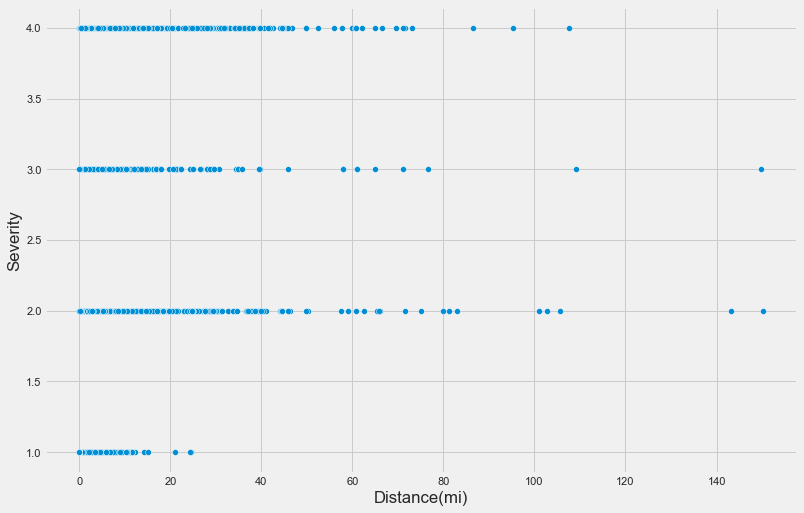

In [54]:
customized_scatterplot(train['Severity'], train['Distance(mi)'])

Okay, I think we have seen enough. Let's discuss what we have found so far. 

# Observations
* Our target variable shows an unequal level of variance across most predictor(independent) variables. This is called **Heteroscedasticity(more explanation below)** and is a red flag for the multiple linear regression model.
* There are many outliers in the scatter plots above that took my attention. 

* The two on the top-right edge of **Severity vs. Distance(mi)** seem to follow a trend, which can be explained by saying that "As the prices increased, so did the area.
* However, The two on the bottom right of the same chart do not follow any trends. We will get rid of these two below.

<a id="3.3"></a>
## 3.3 Feature selection

Here is the process of feature selection, in order to select the best features from which our models can learn.

From the observations made with the correlation matrix, we are going to drop the following features:
    - End_Lat and End_Lng
- Wind Chill

Moreover, we are going to drop the following features:
- ID, Source: since they don't carry any information for the severity
- TMC: because it could already contains information about the accident severity
- Start_Time: because it was decomposed by the time features added before (day, month, weekday)
- End_Time: beause we cannot know in advance when the traffic flow will become regular again
- Description: most description only report the name of the road of the accident, and so we decided to omit this feature for semplicity
    - Number, Street, County, State, Zipcode, Country: because we just focus on the City where the accident happened
- Timezone, Airport_Code, Weather_Timestamp: because they are not useful for our task
    - Turning_Loop: since it's always False
- Sunrise_Sunset, Nautical_Twilight, Astronomical_Twilight: because they are redundant

### Removing multicollinary columns

**---------> OBSERVATIONS**

From the matrix we can see that the start and end GPS coordinates of the accidents are highly correlated.

In fact, from the medium distance shown before, the end of the accident is usually close to the start, so we can consider just one of them for the machine learning models.

Moreover, the wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.

We can also see that the presence of a traffic signal is slightly correlated to the severity of an accident meaning that maybe traffic lights can help the traffic flow when an accident occurs.

From the matrix we can also note that we couldn't compute the covariance with Turning_Loop, and that's because it's always False.

As we look through these scatter plots, I realized that it is time to explain the assumptions of Multiple Linear Regression. Before building a multiple linear regression model, we need to check that these assumptions below are valid.
## Assumptions of Regression

* **Linearity ( Correct functional form )** 
* **Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ). **
* **Independence of Errors ( vs Autocorrelation ) **
* **Multivariate Normality ( Normality of Errors ) **
* **No or little Multicollinearity. ** 

Since we fit a linear model, we assume that the relationship is **linear**, and the errors, or residuals, are pure random fluctuations around the true line. We expect that the variability in the response(dependent) variable doesn't increase as the value of the predictor(independent) increases, which is the assumptions of equal variance, also known as **Homoscedasticity**. We also assume that the observations are independent of one another(**No Multicollinearity**), and a correlation between sequential observations or auto-correlation is not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

So, **How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line.** Let's apply this to each one of them.

**Linearity(Correct functional form):** 
Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present. 

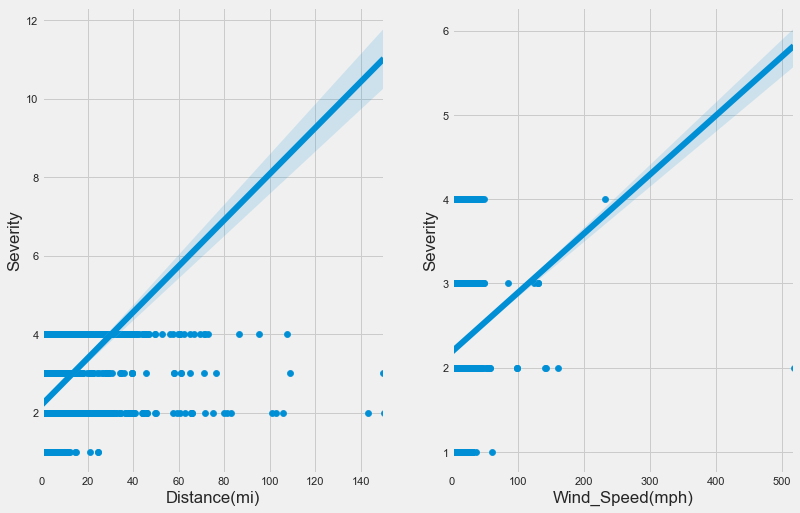

In [55]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for Severity and Distance(mi).
sns.scatterplot( x = train['Distance(mi)'], y = train.Severity,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train['Distance(mi)'], y=train.Severity, ax=ax1)

## Scatter plotting for Severity and ['Wind_Speed(mph)'].
sns.scatterplot(x = train['Wind_Speed(mph)'],y = train.Severity, ax=ax2)
## regression line for MasVnrArea and Severity.
sns.regplot(x=train['Wind_Speed(mph)'], y=train.Severity, ax=ax2);

Severity

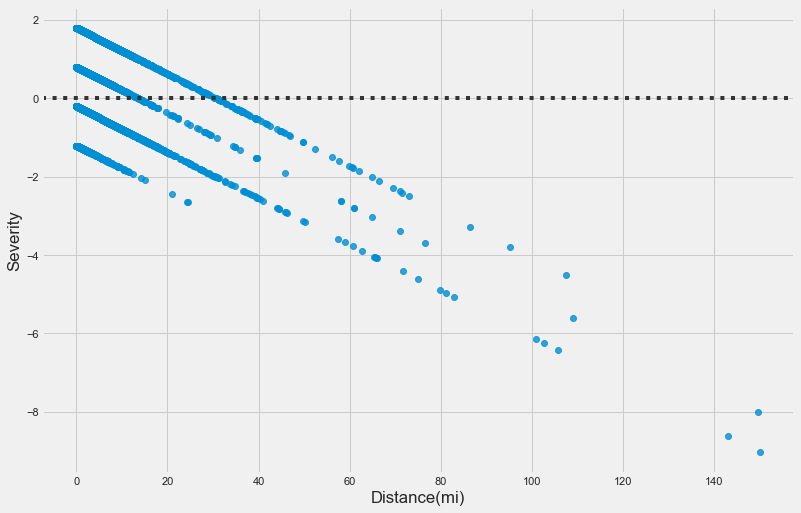

In [56]:
plt.subplots(figsize = (12,8))
sns.residplot(train['Distance(mi)'], train.Severity);

Distance(mi)

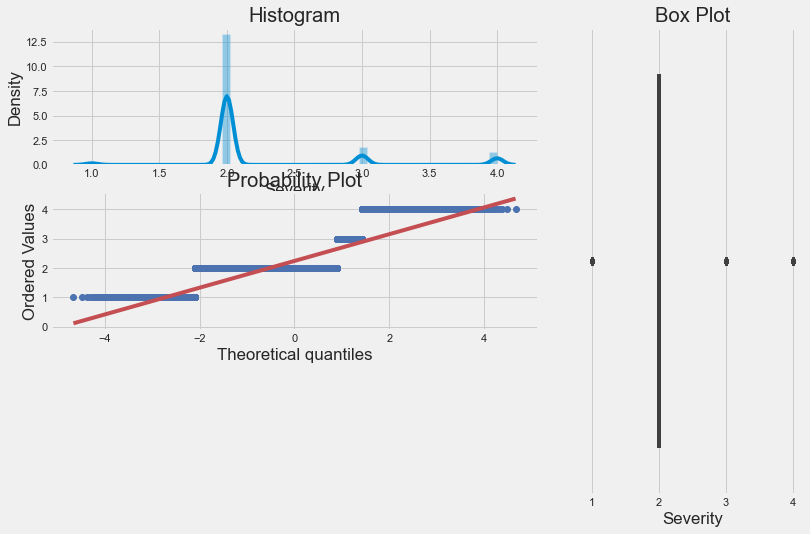

In [57]:
plotting_3_chart(train, 'Severity')

Now, let's make sure that the target variable follows a normal distribution. If you want to learn more about the probability plot(Q-Q plot), try [this](https://www.youtube.com/watch?v=smJBsZ4YQZw) video. You can also check out [this](https://www.youtube.com/watch?v=9IcaQwQkE9I) one if you have some extra time.

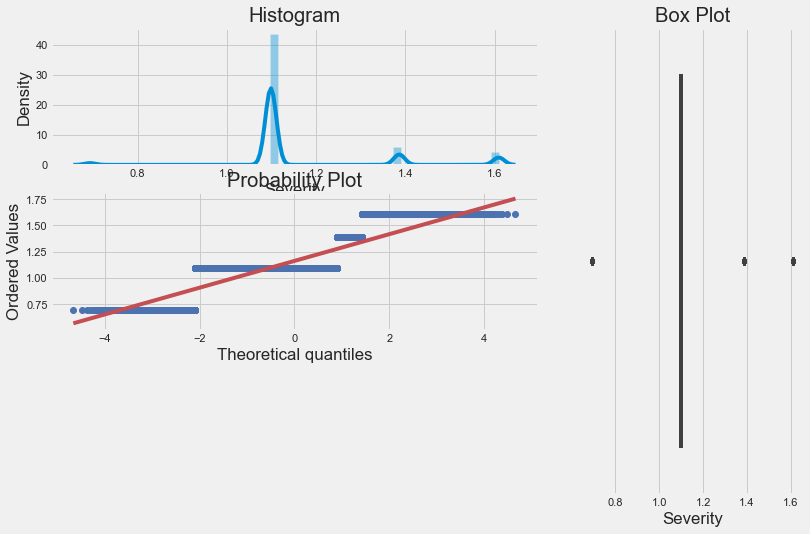

In [58]:
## transforming target variable using numpy.log1p,
train["Severity"] = np.log1p(train["Severity"])

## Plotting the newly transformed response variable
plotting_3_chart(train, 'Severity')

As you can see, the log transformation removes the normality of errors, which solves most of the other errors we talked about above. Let's make a comparison of the pre-transformed and post-transformed state of residual plots. 

Here, we see that the pre-transformed chart on the left has heteroscedasticity, and the post-transformed chart on the right has Homoscedasticity(almost an equal amount of variance across the zero lines). It looks like a blob of data points and doesn't seem to give away any relationships. That's the sort of relationship we would like to see to avoid some of these assumptions. 

**No or Little multicollinearity:** 
Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. Multicollinearity can lead to a variety of problems, including:
* The effect of predictor variables estimated by our regression will depend on what other variables are included in our model. 
* Predictors can have wildly different results depending on the observations in our sample, and small changes in samples can result in very different estimated effects. 
* With very high multicollinearity, the inverse matrix, the computer calculates may not be accurate. 
* We can no longer interpret a coefficient on a variable as the effect on the target of a one-unit increase in that variable holding the other variables constant. The reason behind that is, when predictors are strongly correlated, there is not a scenario in which one variable can change without a conditional change in another variable.

Heatmap is an excellent way to identify whether there is multicollinearity or not. The best way to solve multicollinearity is to use regularization methods like Ridge or Lasso.

### 16. Data Correlation

###### 4. Quantify the association of features and accidents
We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).

To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

0.2 = weak
0.5 = medium
0.8 = strong
0.9 = very strong

In [59]:
train.describe() 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000,438700.000000
mean,1.161569,36.924992,-98.719154,36.925070,-98.719007,0.586301,59.702897,64.663488,29.568323,9.161630,7.595461,0.005713
std,0.167576,5.156410,18.477496,5.156403,18.477345,1.630518,18.043495,22.951424,0.999707,2.861522,5.243357,0.104330
min,0.693147,24.570222,-124.497567,24.570110,-124.497478,0.000000,-89.000000,1.000000,0.300000,0.060000,0.000000,0.000000
25%,1.098612,33.858560,-118.214156,33.858335,-118.214103,0.000000,48.000000,49.000000,29.470000,10.000000,4.600000,0.000000
50%,1.098612,37.354780,-94.525898,37.354760,-94.525877,0.178000,61.000000,68.000000,29.880000,10.000000,7.000000,0.000000
75%,1.098612,40.732080,-80.940801,40.732111,-80.940395,0.593000,73.000000,84.000000,30.040000,10.000000,10.000000,0.000000
max,1.609438,49.000560,-67.403551,49.000760,-67.403550,150.138000,168.800000,100.000000,38.940000,120.000000,518.000000,24.000000


In [60]:
# compare severity level rate across numerical columns
# pd.pivot_table(train, index = 'Severity', values = ['Start_Lat', 'Start_Lng','End_Lat','End_Lng','Distance(mi)','Temperature(F)',
#                                                     'Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)'])

pd.pivot_table(train, index = 'Severity', values = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'])

,Distance(mi),End_Lat,End_Lng,Humidity(%),Precipitation(in),Pressure(in),Start_Lat,Start_Lng,Temperature(F),Visibility(mi),Wind_Speed(mph)
Severity,,,,,,,,,,,
0.693147,0.205729,35.617272,-101.051957,49.897268,0.005023,29.022293,35.617058,-101.051787,71.219805,9.535951,8.377550
1.098612,0.499811,36.785512,-100.343555,64.764718,0.005436,29.564639,36.785488,-100.343740,59.304122,9.127562,7.366809
1.386294,0.611694,37.447182,-92.896021,64.313221,0.008278,29.585440,37.446907,-92.896050,61.666190,9.382665,8.777140
1.609438,1.538834,37.948725,-89.538847,67.654801,0.005117,29.713476,37.948390,-89.538839,58.298382,9.112706,8.109144


**-----------> OBSERVATION**
+ Diverse range of values for different features
+ Distanced algorithm might be benefit from scaling

## d. Multicollinearity of Features

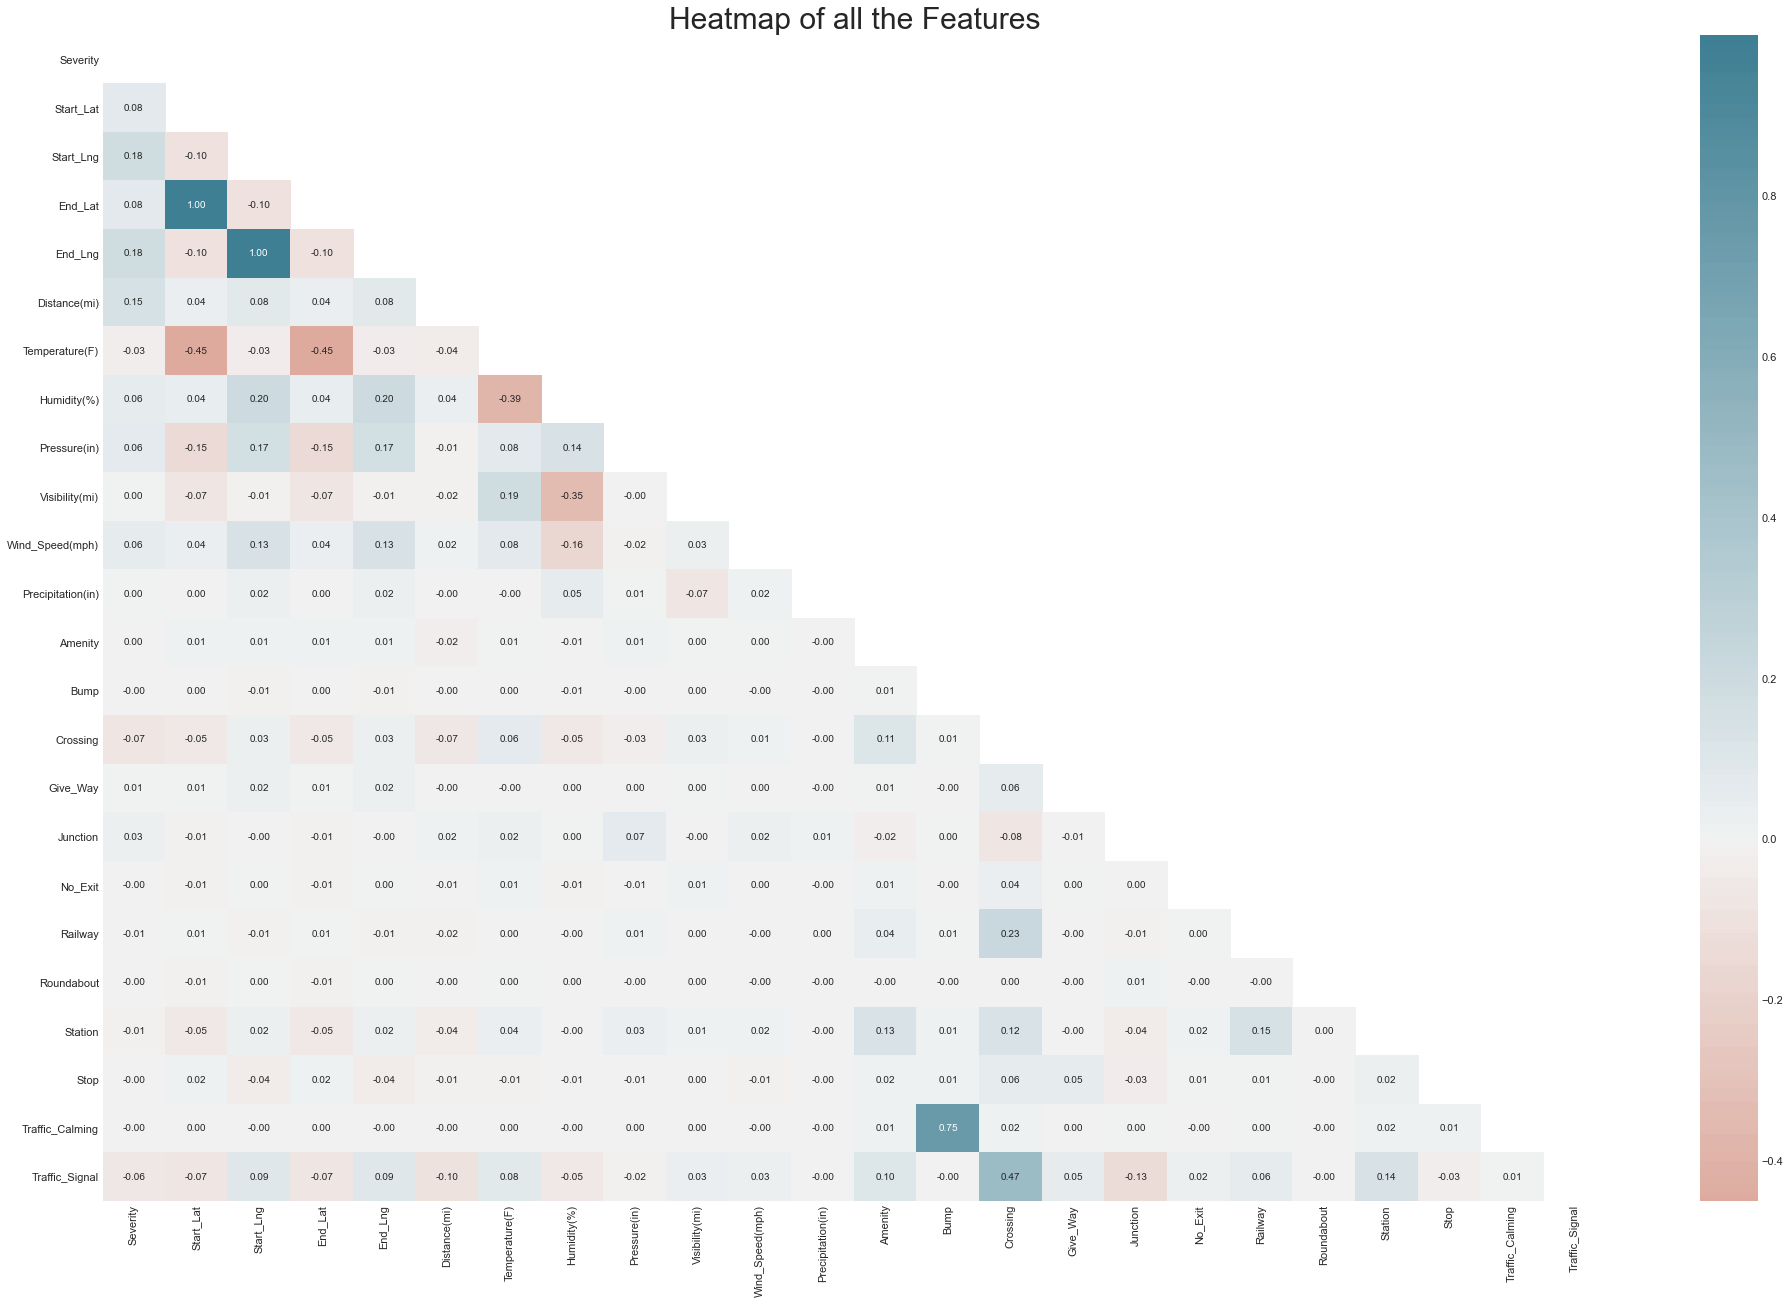

In [61]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x)

## Plot fig sizing. 
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True,
            fmt = ".2f",
            center = 0, 
           );

## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

### ---------> OBSERVATION
<hr>

+ From the matrix we can see that the start and end GPS coordinates of the accidents are highly correlated.

+ In fact, from the medium distance shown before, the end of the accident is usually close to the start, so we can consider just one of them for the machine learning models.

+ Moreover, the wind chill (temperature) is directly proportional to the temperature, so we can also drop one of them.

+ We can also see that the presence of a traffic signal is slightly correlated to the severity of an accident meaning that maybe traffic lights can help the traffic flow when an accident occurs.

+ From the matrix we can also note that we couldn't compute the covariance with Turning_Loop, and that's because it's always False.

<hr>

### Interpretation

* R-squared and adjusted R-squared
    * R-squared is a measure of how well the model fits the data
    * This model and these independent variables explain 71% of the variance in MPG
    * Adjusted R-squared accounts for more independent variables
* Coefficient
    * Intercept: Coefficient of 45.2511 means that with all variables at 0, MPG would have a prediction of 45.2511
    * Independent variables: A **one unit increase** in the independent variable will lead to a **coefficient amount** increase in the dependent variable
* The Hypothesis (per each independent variable)
    * $H_0$: coefficient = 0
    * $H_A$: coefficient != 0
    * We're looking to see if there's a relationship between each independent variable and the dependent variable
    * **t-statistic** is the t-stat from this t-test of whether the coefficient is equal to zero
    * **p-value** -- a p-value below 0.05 (if alpha = 0.05) is evidence to **reject the null hypothesis** so there is statistical evidence that there is a relationship between independent and dependent variable
    * a p-value above 0.05 is saying that **statistically**, there is no relationship between independent and dependent variable
    * The p-value is the associated p-value of the **t-statistic** -- therefore if the t-statistic is **outside the [0.025-0.975] confidence interval**, the p-value should be below 0.05

In [64]:
# creating the correlation pairs
corr = train.corr().abs().stack().reset_index().sort_values(0, ascending=False)
display(corr)

# setting the index to the pair of variables
corr['pairs'] = list(zip(corr.level_0, corr.level_1))
corr.set_index(['pairs'], inplace = True)
corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
corr.columns = ['cc']

corr.drop_duplicates(inplace=True)
corr[(corr.cc>.5) & (corr.cc<1)]

,level_0,level_1,0
0,Severity,Severity,1.000000
300,Amenity,Amenity,1.000000
75,End_Lat,End_Lat,1.000000
100,End_Lng,End_Lng,1.000000
125,Distance(mi),Distance(mi),1.000000
...,...,...,...
277,Precipitation(in),Bump,0.000077
491,Station,Precipitation(in),0.000063
284,Precipitation(in),Station,0.000063
186,Humidity(%),Railway,0.000011


,cc
pairs,
"(Start_Lng, End_Lng)",0.999999
"(Start_Lat, End_Lat)",0.999994
"(Traffic_Calming, Bump)",0.752001


Let's drop variables that are highly correlated with other variables.

In [65]:
train.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Side,City,County,State,Zipcode,Timezone,Airport_Code,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Time_Month,Start_Time_Year,Start_Time_Hour,End_Time_Month,End_Time_Year,End_Time_Hour,Weather_Timestamp_Month,Weather_Timestamp_Year,Weather_Time_Hour
377127,1.098612,39.10148,-84.52341,39.09841,-84.52241,0.219,r,cincinnati,hamilton,oh,45202,us/eastern,kluk,36.0,97,29.70,10.0,calm,7.0,0.02,cloudy,False,False,False,False,True,False,False,False,False,False,False,False,night,night,night,day,02,2016,06,02,2016,12,02,2016,05
108963,1.098612,41.06213,-81.53784,41.06217,-81.53547,0.123,r,akron,summit,oh,44311,us/eastern,kakr,39.0,55,29.65,10.0,calm,7.0,0.00,cloudy,False,False,False,False,False,False,False,False,False,False,False,False,night,night,day,day,02,2016,06,02,2016,12,02,2016,06
410084,1.098612,39.06324,-84.03243,39.06731,-84.05851,1.427,r,williamsburg,clermont,oh,45176,us/eastern,ki69,35.6,100,29.66,10.0,w,8.1,0.00,cloudy,False,False,False,False,False,False,False,False,False,False,False,True,day,day,day,day,02,2016,08,02,2016,14,02,2016,08
73848,1.098612,40.10931,-82.96849,40.11078,-82.98400,0.826,r,westerville,franklin,oh,43081,us/eastern,kcmh,32.0,100,29.59,0.5,w,3.5,0.05,snow,False,False,False,False,False,False,False,False,False,False,False,False,day,day,day,day,02,2016,15,02,2016,21,02,2016,15
421676,1.098612,40.99613,-85.26613,40.98982,-85.26986,0.477,r,roanoke,allen,in,46783,us/eastern,kfwa,28.0,88,29.71,8.0,w,16.1,0.00,snow,False,False,False,False,False,False,False,False,False,False,False,False,night,night,night,night,02,2016,21,02,2016,03,02,2016,20


# Missing Values

In [66]:
print("Total missing values in TRAIN:", train.isna().sum().sum())
print("Total missing values in TEST:", test.isna().sum().sum())
print("Total missing values in VALIDATION:", validation.isna().sum().sum())

Total missing values in TRAIN: 0
Total missing values in TEST: 0
Total missing values in VALIDATION: 0


In [67]:
"""
Weather_Timestamp_Year     5.397496e-02
Start_Time_Year            5.397496e-02
End_Time_Year              5.393419e-02
Start_Lng                  3.396511e-02
End_Lng                    3.396466e-02
Distance(mi)               2.444140e-02
Start_Time_Month           1.506702e-02
Weather_Timestamp_Month    1.506671e-02
End_Time_Month             1.499724e-02
End_Lat                    5.683214e-03
Start_Lat                  5.680420e-03
Wind_Speed(mph)            3.603532e-03
Pressure(in)               3.125942e-03
Crossing                   3.034795e-03
Humidity(%)                2.437293e-03
Traffic_Signal             2.022418e-03
Junction                   4.500038e-04
Temperature(F)             3.263240e-04
Start_Time_Hour            2.244022e-04
Weather_Time_Hour          1.877970e-04
Station                    1.217496e-04
Give_Way                   4.180763e-05
Visibility(mi)             2.983816e-05
Railway                    1.913345e-05
Bump                       1.229787e-05
Amenity                    9.943897e-06
Precipitation(in)          9.772687e-06
End_Time_Hour              7.921444e-06
No_Exit                    1.122199e-06
Traffic_Calming            1.111709e-06
Stop                       1.101762e-07
Roundabout                 5.011702e-08
"""

'\nWeather_Timestamp_Year     5.397496e-02\nStart_Time_Year            5.397496e-02\nEnd_Time_Year              5.393419e-02\nStart_Lng                  3.396511e-02\nEnd_Lng                    3.396466e-02\nDistance(mi)               2.444140e-02\nStart_Time_Month           1.506702e-02\nWeather_Timestamp_Month    1.506671e-02\nEnd_Time_Month             1.499724e-02\nEnd_Lat                    5.683214e-03\nStart_Lat                  5.680420e-03\nWind_Speed(mph)            3.603532e-03\nPressure(in)               3.125942e-03\nCrossing                   3.034795e-03\nHumidity(%)                2.437293e-03\nTraffic_Signal             2.022418e-03\nJunction                   4.500038e-04\nTemperature(F)             3.263240e-04\nStart_Time_Hour            2.244022e-04\nWeather_Time_Hour          1.877970e-04\nStation                    1.217496e-04\nGive_Way                   4.180763e-05\nVisibility(mi)             2.983816e-05\nRailway                    1.913345e-05\nBump         

In [68]:
# select non-numeric columns
categorical = train.select_dtypes(exclude=[np.number])
categorical = categorical.columns.tolist()
print(f'List of non numeric in train dataset is {categorical}\n\n')


# select numeric columns
numeric = train.select_dtypes(include=[np.number])
numeric = numeric.columns.tolist()
print(f'List of numeric in test dataset is {numeric}\n\n')

List of non numeric in train dataset is ['Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Timestamp_Year', 'Weather_Time_Hour']


List of numeric in test dataset is ['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']




In [80]:
unneeded_columns = ['Side', 'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump',  
                    'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset', 
                    'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 
                    'Start_Lat', 'End_Lat', 'End_Lng', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 
                    'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Time_Hour']

data = train.drop(unneeded_columns, axis=1)
test = test.drop(unneeded_columns, axis=1)
validation = validation.drop(unneeded_columns, axis=1)

# Encoding

In [81]:
data = data.replace([True, False], [1,0])
test = test.replace([True, False], [1,0])
validation = validation.replace([True, False], [1,0])


def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

"""
List of non numeric in train dataset is ['Timezone', 'Crossing', 'Traffic_Signal']


List of numeric in test dataset is ['Severity', 'Weather_Timestamp_Year', 'Start_Lng', 'Distance(mi)', 'Humidity(%)', 'Pressure_bc', 'Wind_Speed_bc']

['Start_Lat', 'End_Lat', 'End_Lng', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 
'Start_Time_Month', 'Start_Time_Year', 'Start_Time_Hour', 'End_Time_Month', 'End_Time_Year', 'End_Time_Hour', 'Weather_Timestamp_Month', 'Weather_Time_Hour']
"""

data = onehot_encode(
    data,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

test = onehot_encode(
    test,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

validation = onehot_encode(
    validation,
    columns=['Timezone', 'Crossing', 'Traffic_Signal'],
    prefixes=['Timezone', 'Crossing', 'Traffic_Signal']
)

In [82]:
data.head(3)

,Severity,Start_Lng,Distance(mi),Humidity(%),Pressure(in),Wind_Speed(mph),Weather_Timestamp_Year,Timezone_us/central,Timezone_us/eastern,Timezone_us/mountain,Timezone_us/pacific,Crossing_0,Crossing_1,Traffic_Signal_0,Traffic_Signal_1
377127,1.098612,-84.52341,0.219,97,29.70,7.0,2016,0,1,0,0,1,0,1,0
108963,1.098612,-81.53784,0.123,55,29.65,7.0,2016,0,1,0,0,1,0,1,0
410084,1.098612,-84.03243,1.427,100,29.66,8.1,2016,0,1,0,0,1,0,0,1


In [83]:
data.columns[1:]
formula = 'Severity ~ '+ '+'.join(data.columns[1:])
formula

'Severity ~ Start_Lng+Distance(mi)+Humidity(%)+Pressure(in)+Wind_Speed(mph)+Weather_Timestamp_Year+Timezone_us/central+Timezone_us/eastern+Timezone_us/mountain+Timezone_us/pacific+Crossing_0+Crossing_1+Traffic_Signal_0+Traffic_Signal_1'

### I need to rename the columns in order to fit into ols stats model

In [84]:
formula = 'Severity ~ '+ '+'.join(data1.columns[1:])
formula


'Severity ~ Start_Lat+Start_Lng+End_Lat+End_Lng+Distance_mi+Side+City+County+State+Zipcode+Timezone+Airport_Code+Temperature+Humidity_perc+Pressure_in+Visibility+Wind_Direction+Wind_Speed_mph+Precipitation+Weather_Condition+Amenity+Bump+Crossing+Give_Way+Junction+No_Exit+Railway+Roundabout+Station+Stop+Traffic_Calming+Traffic_Signal+Sunrise_Sunset+Civil_Twilight+Nautical_Twilight+Astronomical_Twilight+Start_Time_Month+Start_Time_Year+Start_Time_Hour+End_Time_Month+End_Time_Year+End_Time_Hour+Weather_Timestamp_Month+Weather_Timestamp_Year+Weather_Time_Hour'

In [85]:
# Rename the copy DataFrame to fit into stats model
data1 = data.rename(columns={'Distance(mi)': 'Distance_mi', 'Humidity(%)': 'Humidity_perc', 'Pressure(in)': 'Pressure_in', 'Wind_Speed(mph)': 'Wind_Speed_mph'})


data.columns[1:]
formula = 'Severity ~ '+ '+'.join(data1.columns[1:])

model = ols(formula='Severity ~ Start_Lng+Distance_mi+Humidity_perc+Pressure_in+Wind_Speed_mph+Weather_Timestamp_Year+Crossing_0+Crossing_1+Traffic_Signal_0+Traffic_Signal_1', data=data1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     5954.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        14:11:02   Log-Likelihood:             1.9169e+05
No. Observations:              438700   AIC:                        -3.834e+05
Df Residuals:                  438688   BIC:                        -3.832e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.7417      0.004    186.743      0.000       0.734       0.750
Weather_Timestamp_Year[T.2017]     0.0156      0.001     14.818      0.000       0.014       0.018
Weather_Timestamp_Year[T.2018]     0.0265      0.001     24.945      0.000       0.024       0.029
Weather_Timestamp_Year[T.2019]    -0.0065      0.001     -6.540      0.000      -0.008      -0.005
Weather_Timestamp_Year[T.2020]    -0.0835      0.001    -94.854      0.000      -0.085      -0.082
Start_Lng                          0.0017   1.37e-05    120.323      0.000       0.002       0.002
Distance_mi                        0.0125      0.000     85.283      0.000       0.012       0.013
Humidity_perc                      0.0002   1.08e-05     19.328      0.000       0.000       0.000
Pressure_in                       -0.0054      0.000    -21.175      0.000      -0.006      -0.005
Wind_Speed_mph                     0.0001   4.68e-05      2.344      0.019     1.8e-05       0.000
Crossing_0                         0.3848      0.002    187.639      0.000       0.381       0.389
Crossing_1                         0.3570      0.002    171.009      0.000       0.353       0.361
Traffic_Signal_0                   0.3759      0.002    184.565      0.000       0.372       0.380
Traffic_Signal_1                   0.3658      0.002    180.436      0.000       0.362       0.370
==============================================================================
Omnibus:                    77571.158   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163664.586
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       5.131   Cond. No.                     4.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### -------------> OBSERVATION

<hr>

+ All columns have low p values indicate that all of my selected columns are statiscally significant
+ The Adj. R-squared 0.130 indicates the amount of variability being explained by my model

<hr>

# 📈 Training a Linear Regression Model

> Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

## X and y arrays

## 🧱 Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [11]:
X = data.drop(['Severity'], axis = 1)
y = data['Severity']

X_train = X
y_train = y

accident_ID = test.ID.to_list()
TEST = test.drop(['ID'], axis = 1)

X_test = validation.drop(['Severity'], axis = 1)
y_test = validation['Severity']

# 📦 Preparing Data For Multiple Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations which can be intimidating. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.
- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
- **Remove Noise.** Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [12]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
TEST = pipeline.fit_transform(TEST)

CPU times: user 182 ms, sys: 56.2 ms, total: 238 ms
Wall time: 237 ms


## ✔️ Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> - **Residuals** (R2):

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** is independent of each other, independent of x, normally distributed, common variance, have 0 mean

> All of these are **loss functions**, because we want to minimize them.

In [13]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# ✔️ Linear Regression

In [14]:
%%time

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

CPU times: user 686 ms, sys: 36.9 ms, total: 722 ms
Wall time: 161 ms


LinearRegression(normalize=True)

## ✔️ Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [15]:
# print the intercept
print(lin_reg.intercept_)

2.2436152268064813


In [16]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Start_Lng,0.097434
Distance(mi),0.077578
Humidity(%),0.014195
Pressure(in),-0.008437
Wind_Speed(mph),0.004347
Weather_Timestamp_Year,-0.132636
Timezone_us/central,0.016757
Timezone_us/eastern,-0.009869
Timezone_us/mountain,0.015907
Timezone_us/pacific,-0.011300


> Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Distance(mi)** is associated with an **increase of \0.087860**.
- Holding all other features fixed, a 1 unit increase in **Temperature(F)** is associated with an **decrease of \-0.014064**.

## ✔️ Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [17]:
%%time

pred = lin_reg.predict(X_test)

CPU times: user 29.3 ms, sys: 1.67 ms, total: 31 ms
Wall time: 3 ms


In [18]:
# import hvplot.pandas

# pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

**Residual Histogram**

In [19]:
# pd.DataFrame({'Error Values': (y_test - pred)}).hvplot.kde()

In [20]:
%%time

test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38924215539652685
MSE: 0.33264771622254435
RMSE: 0.5767562017200546
R2 Square 0.10585651365312154
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3915014139432668
MSE: 0.3346944908173718
RMSE: 0.5785278652038913
R2 Square 0.10676120822475399
__________________________________
CPU times: user 274 ms, sys: 23.9 ms, total: 298 ms
Wall time: 30.5 ms


In [21]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365


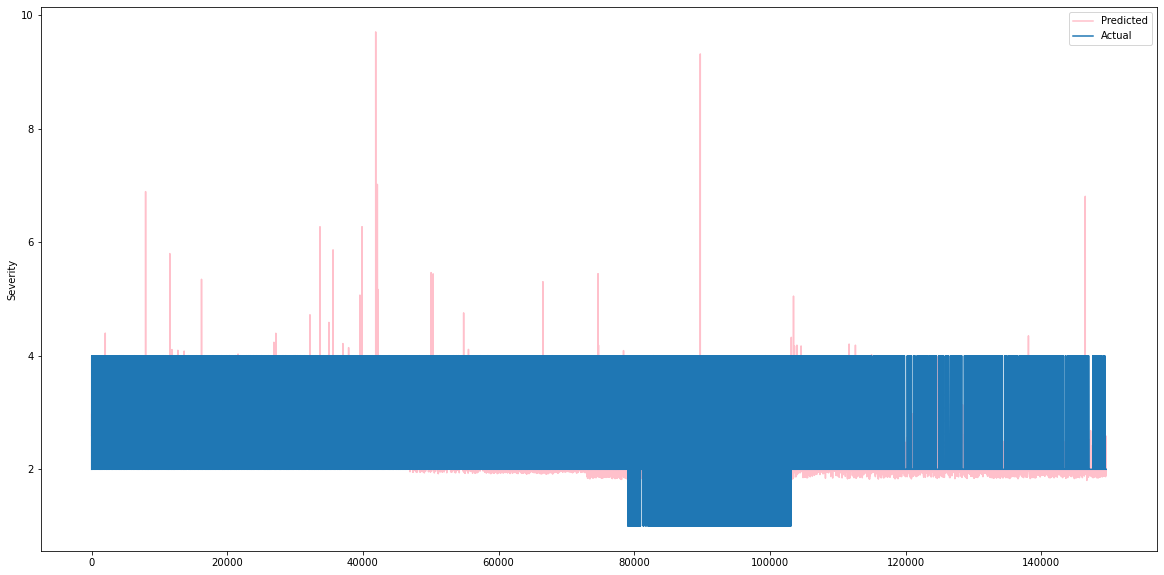

In [22]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [23]:
%%time

y_predict_model_lin_reg = lin_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_model_lin_reg})

output.to_csv('submission_lin_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 1.98 s, sys: 63.4 ms, total: 2.04 s
Wall time: 278 ms


# Regularization Techniques

* Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. However, if the coefficients are too large, it can lead to model over-fitting on the training dataset. Such a model will not generalize well on the unseen data. To overcome this shortcoming, we do regularization which penalizes large coefficients. The following are the regularization algorithms.

#### Pros of Regularization

--> We can use a regularized model to reduce the dimensionality of the training dataset. Dimensionality reduction is important because of three main reasons:

--> Prevents Overfitting: A high-dimensional dataset having too many features can sometimes lead to overfitting (model captures both real and random effects).

--> Simplicity: An over-complex model having too many features can be hard to interpret especially when features are correlated with each other.

--> Computational Efficiency: A model trained on a lower dimensional dataset is computationally efficient (execution of algorithm requires less computational time).


#### Cons of Regularization

--> Regularization leads to dimensionality reduction, which means the machine learning model is built using a lower dimensional dataset. This generally leads to a high bias errror.

--> If regularization is performed before training the model, a perfect balance between bias-variance tradeoff must be used.


# ✔️ Ridge Regression

> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

> Ridge regression addresses some of the problems of **Ordinary Least Squares** by imposing a penalty on the size of coefficients. The ridge coefficients minimize a penalized residual sum of squares,

$$\min_{w}\big|\big|Xw-y\big|\big|^2_2+\alpha\big|\big|w\big|\big|^2_2$$

> $\alpha>=0$ is a complexity parameter that controls the amount of shrinkage: the larger the value of $\alpha$, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

> Ridge regression is an L2 penalized model. Add the squared sum of the weights to the least-squares cost function.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.

In [24]:
%%time

from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.38924229234768715
MSE: 0.3326473322269612
RMSE: 0.5767558688274972
R2 Square 0.10585754581757867
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3915016867413131
MSE: 0.334694503656912
RMSE: 0.5785278763006256
R2 Square 0.10676117395835383
__________________________________
CPU times: user 352 ms, sys: 32 ms, total: 384 ms
Wall time: 60.6 ms


In [25]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364


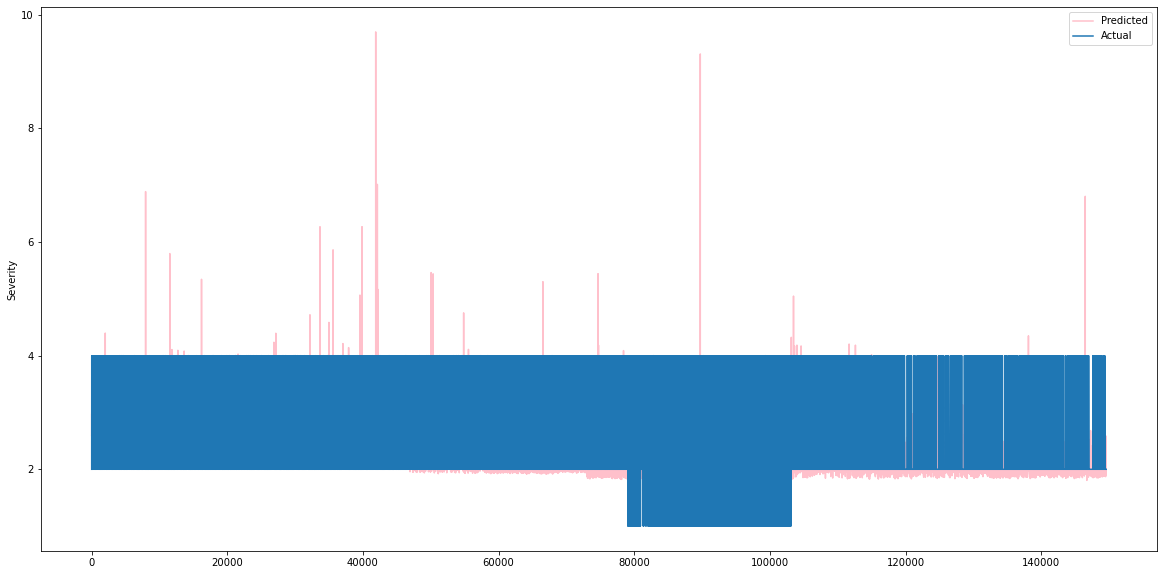

In [26]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [27]:
%%time

y_predict_Ridge = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_Ridge})

output.to_csv('submission_Ridge.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 1.97 s, sys: 58.9 ms, total: 2.03 s
Wall time: 265 ms


# ✔️ LASSO Regression

> A linear model that estimates sparse coefficients.

> Mathematically, it consists of a linear model trained with $\ell_1$ prior as regularizer. The objective function to minimize is:

$$\min_{w}\frac{1}{2n_{samples}} \big|\big|Xw - y\big|\big|_2^2 + \alpha \big|\big|w\big|\big|_1$$

> The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha \big|\big|w\big|\big|_1$ added, where $\alpha$ is a constant and $\big|\big|w\big|\big|_1$ is the $\ell_1-norm$ of the parameter vector.
***

#### Pros

--> Avoids overfitting a model.

--> The ridge estimator is preferably good at improving the least-squares estimate when there is multicollinearity.


#### Cons

--> They include all the predictors in the final model.

--> They are unable to perform feature selection.

--> They shrink the coefficients towards zero.

--> They trade the variance for bias.


In [28]:
%%time

from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4301567860780011
MSE: 0.36931402864572954
RMSE: 0.6077121264593373
R2 Square 0.007298962157360589
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.43198133503271285
MSE: 0.3719710178771606
RMSE: 0.6098942677851306
R2 Square 0.007276929558716283
__________________________________
CPU times: user 445 ms, sys: 33.9 ms, total: 479 ms
Wall time: 69.1 ms


In [29]:
results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343


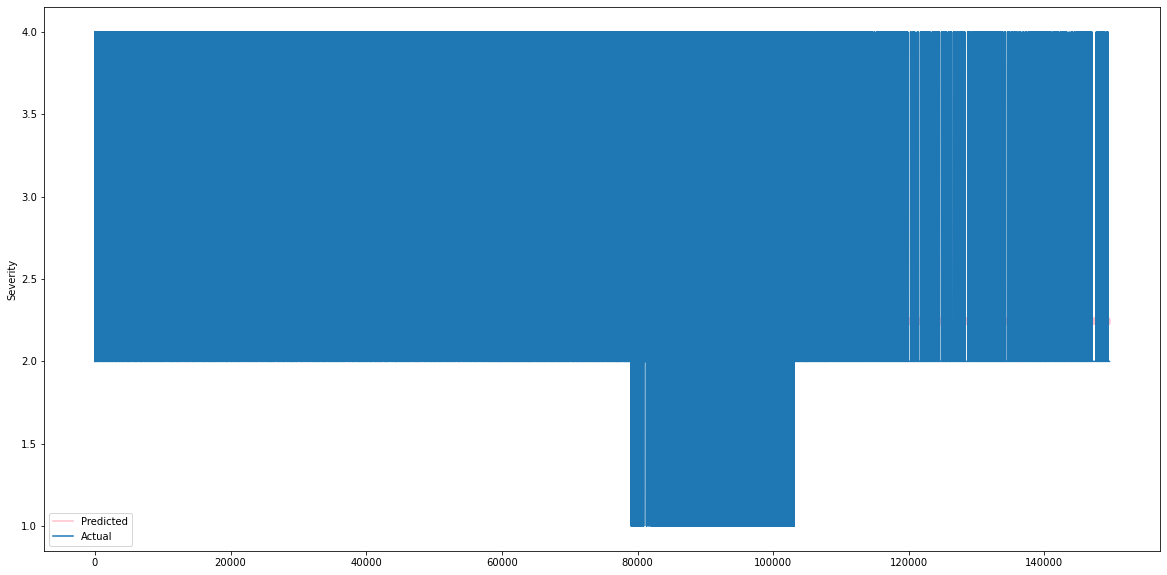

In [30]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [31]:
%%time

y_predict_Lasso = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_Lasso})

output.to_csv('submission_lasso.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 1.99 s, sys: 55.2 ms, total: 2.04 s
Wall time: 271 ms


# ✔️ Elastic Net

> A linear regression model trained with L1 and L2 prior as regularizer. 

> This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 

> Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

> A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

> The objective function to minimize is in this case

$$\min_{w}{\frac{1}{2n_{samples}} \big|\big|X w - y\big|\big|_2 ^ 2 + \alpha \rho \big|\big|w\big|\big|_1 +
\frac{\alpha(1-\rho)}{2} \big|\big|w\big|\big|_2 ^ 2}$$
***

#### Pros
--> Doesn’t have the problem of selecting more than n predictors when n<<p, whereas LASSO saturates when n<<p.

#### Cons
--> Computationally more expensive than LASSO or Ridge.

In [32]:
%%time 

from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.4188488488511532
MSE: 0.35536083994218415
RMSE: 0.5961214976346552
R2 Square 0.044804563983580015
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.4210181418015588
MSE: 0.357933800569773
RMSE: 0.5982756894357091
R2 Square 0.04473971239961849
__________________________________
CPU times: user 793 ms, sys: 19.5 ms, total: 813 ms
Wall time: 117 ms


In [33]:
results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694


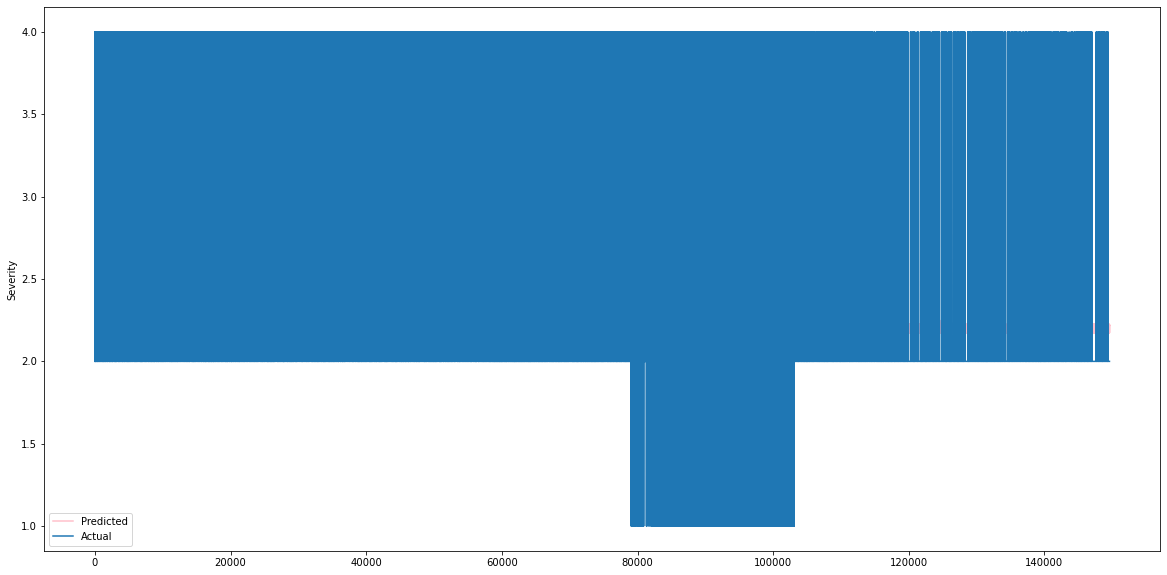

In [34]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [35]:
%%time

y_predict_ElasticNet = model.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_ElasticNet})

output.to_csv('submission_ElasticNet.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2 s, sys: 40.6 ms, total: 2.05 s
Wall time: 259 ms


# ✔️ Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

In [36]:
%%time

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)
TEST_2d = poly_reg.fit_transform(TEST)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.3773043805247707
MSE: 0.31373333823391025
RMSE: 0.5601190393424511
R2 Square 0.1566975898188918
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.37973704963929295
MSE: 0.31530457106802945
RMSE: 0.5615198759331939
R2 Square 0.1585093814534918
__________________________________
CPU times: user 10.2 s, sys: 545 ms, total: 10.7 s
Wall time: 3.02 s


In [37]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694
4,Polynomial Regression,0.377304,0.313733,0.560119,0.156698,0.000000


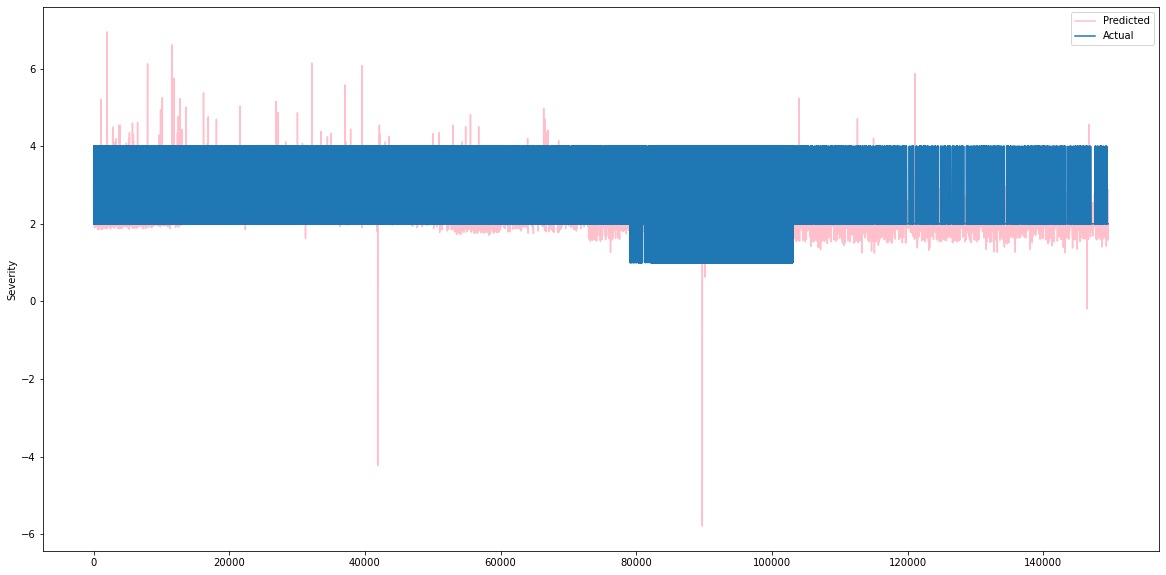

In [38]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [39]:
%%time

y_predict_poly_reg = lin_reg.predict(TEST_2d)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_poly_reg

output.to_csv('submission_poly_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 2.07 s, sys: 30.7 ms, total: 2.1 s
Wall time: 306 ms


# ✔️ Stochastic Gradient Descent

> Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [40]:
%%time

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.389218736044035
MSE: 0.33264647610880654
RMSE: 0.576755126642847
R2 Square 0.10585984702824158
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.39147861183006155
MSE: 0.334694791181654
RMSE: 0.5785281247974501
R2 Square 0.10676040660705222
__________________________________
CPU times: user 17.2 s, sys: 67.5 ms, total: 17.2 s
Wall time: 16.9 s


In [41]:
results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694
4,Polynomial Regression,0.377304,0.313733,0.560119,0.156698,0.000000
5,Stochastic Gradient Descent,0.389219,0.332646,0.576755,0.105860,0.000000


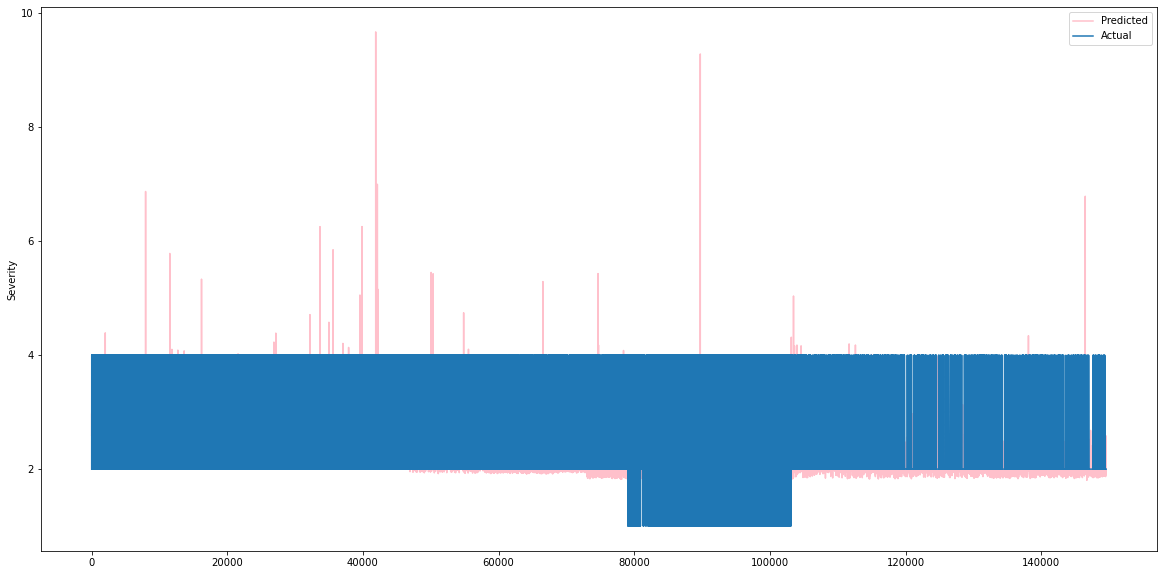

In [42]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [43]:
%%time

y_predict_poly_sgd_reg = sgd_reg.predict(TEST)

output = pd.DataFrame({"ID": accident_ID, "Severity": y_predict_poly_sgd_reg})

output.to_csv('submission_sgd_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!
CPU times: user 1.99 s, sys: 58.8 ms, total: 2.05 s
Wall time: 273 ms


# ✔️ Artficial Neural Network

In [44]:
%%time

# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=20)

Defaulting to user installation because normal site-packages is not writeable
Epoch 1/20
438700/438700 [==============================] - 366s 833us/step - loss: 0.3470 - val_loss: 0.3155
Epoch 2/20
438700/438700 [==============================] - 340s 774us/step - loss: 0.3165 - val_loss: 0.3082
Epoch 3/20
438700/438700 [==============================] - 344s 785us/step - loss: 0.3118 - val_loss: 0.3091
Epoch 4/20
438700/438700 [==============================] - 367s 836us/step - loss: 0.3091 - val_loss: 0.3033
Epoch 5/20
438700/438700 [==============================] - 354s 807us/step - loss: 0.3075 - val_loss: 0.3023
Epoch 6/20
438700/438700 [==============================] - 340s 774us/step - loss: 0.3059 - val_loss: 0.3027
Epoch 7/20
438700/438700 [==============================] - 363s 828us/step - loss: 0.3048 - val_loss: 0.3045
Epoch 8/20
438700/438700 [==============================] - 358s 815us/step - loss: 0.3037 - val_loss: 0.2998
Epoch 9/20
438700/438700 [================

**---->OBSERVATION**

In [45]:
%%time

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.35044962958752024
MSE: 0.2923841400772131
RMSE: 0.5407255681741091
R2 Square 0.21408336323502042
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.35174501584294665
MSE: 0.2928326678575192
RMSE: 0.5411401554657713
R2 Square 0.21848280863368186
__________________________________
CPU times: user 8.48 s, sys: 1.59 s, total: 10.1 s
Wall time: 6.96 s


In [46]:
results_df_2 = pd.DataFrame(data=[["Artificial Neural Network", *evaluate(y_test, test_pred), 0]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694
4,Polynomial Regression,0.377304,0.313733,0.560119,0.156698,0.000000
5,Stochastic Gradient Descent,0.389219,0.332646,0.576755,0.105860,0.000000
6,Artificial Neural Network,0.350450,0.292384,0.540726,0.214083,0.000000


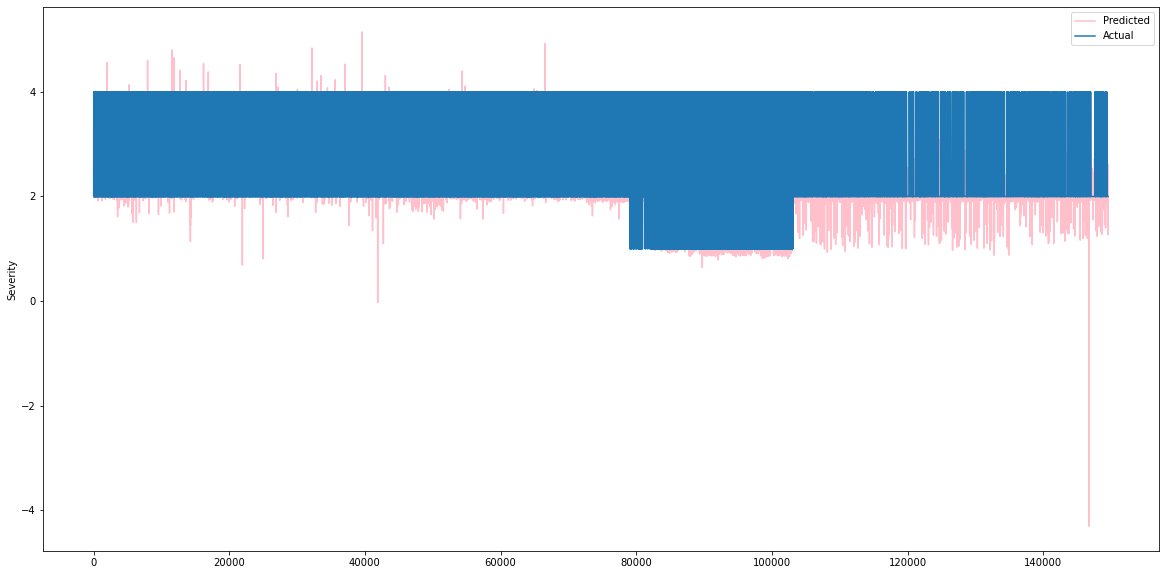

In [47]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [48]:
y_predict_model_arti = model.predict(TEST)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_model_arti

output.to_csv('submission_arti.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


# ✔️ Random Forest Regressor

In [49]:
%%time

from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.2984609327741596
MSE: 0.2475584123698622
RMSE: 0.49755242173047676
R2 Square 0.33457309004099756
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11514538895852373
MSE: 0.037131347337183
RMSE: 0.19269495929365407
R2 Square 0.9009031796386806
__________________________________
CPU times: user 22min 4s, sys: 6.47 s, total: 22min 11s
Wall time: 22min 11s


In [50]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.389242,0.332648,0.576756,0.105857,-0.165365
1,Ridge Regression,0.389242,0.332647,0.576756,0.105858,-0.165364
2,Lasso Regression,0.430157,0.369314,0.607712,0.007299,-0.304343
3,Elastic Net Regression,0.418849,0.355361,0.596121,0.044805,-0.321694
4,Polynomial Regression,0.377304,0.313733,0.560119,0.156698,0.000000
5,Stochastic Gradient Descent,0.389219,0.332646,0.576755,0.105860,0.000000
6,Artificial Neural Network,0.350450,0.292384,0.540726,0.214083,0.000000
7,Random Forest Regressor,0.298461,0.247558,0.497552,0.334573,0.000000


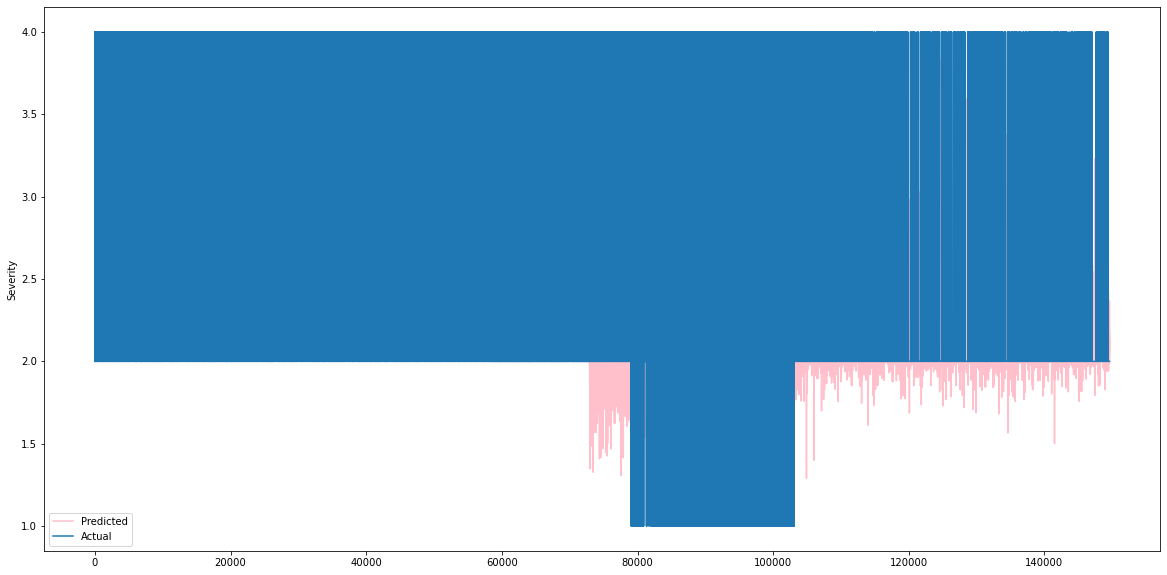

In [51]:
plt.figure(figsize = (20,10))

plt.plot(test_pred, label='Predicted', color='pink')
plt.plot(y_test, label='Actual')

plt.ylabel('Severity')

plt.legend()
plt.show()

In [52]:
y_predict_rf_reg = rf_reg.predict(TEST)

output = pd.DataFrame()
output['ID'] = accident_ID
output['Severity'] = y_predict_rf_reg

output.to_csv('submission_rf_reg.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


# 📊 Models Comparison

<AxesSubplot:ylabel='Model'>

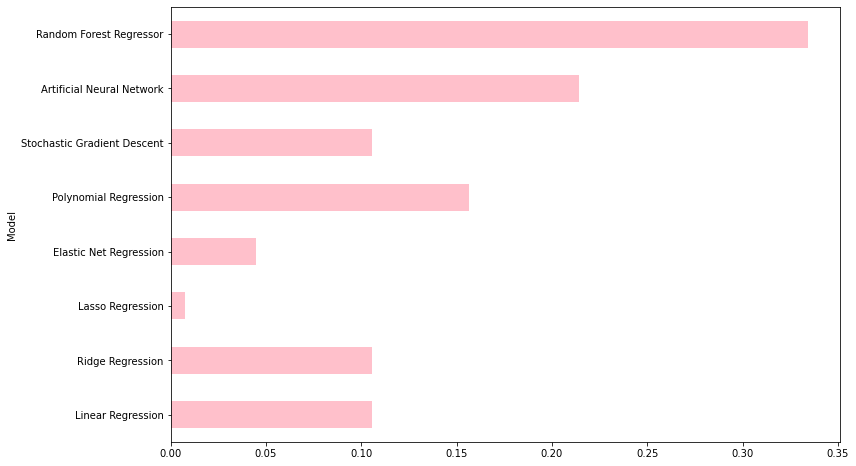

In [53]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8), color='pink')

In [54]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(lin_reg, 'lin_reg.pkl')
joblib.dump(model, 'arti.pkl')
joblib.dump(rf_reg, 'RandomForest.pkl')

INFO:tensorflow:Assets written to: ram://f1be3716-9837-4bf6-92b4-c3ab9190a266/assets


['RandomForest.pkl']

# 📝 Summary
In this notebook you discovered the linear regression algorithm for machine learning.

You covered a lot of ground including:
> - The common linear regression models (Ridge, Lasso, ElasticNet, ...).
> - The representation used by the model.
> - Learning algorithms used to estimate the coefficients in the model.
> - Rules of thumb to consider when preparing data for use with linear regression.
> - How to evaluate a linear regression model.

<a id="7"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>🔗 6. References</strong></h1>

+ Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [“A Countrywide Traffic Accident Dataset.”](https://arxiv.org/abs/1906.05409), arXiv preprint arXiv:1906.05409 (2019). Access Nov 27, 2021.

+ Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. [“Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.”](https://arxiv.org/abs/1909.09638) In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019. Access Nov 27, 2021.

+ Sobhan Moosavi, Mohammad Hossein Samavatian, Arnab Nandi, Srinivasan
Parthasarathy, and Rajiv Ramnath. 2019. Short and Long-term Pattern Discovery
Over Large-Scale Geo-Spatiotemporal Data. In Proceedings of the 25th ACM
SIGKDD International Conference on Knowledge Discovery & Data Mining. ACM.

+ [Scikit-learn library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
+ [Linear Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

+ <a href="https://towardsdatascience.com/usa-accidents-data-analysis-d130843cde02">USA Accidents Data Analysis</a>

+ https://www.kaggle.com/sobhanmoosavi/us-accidents/discussion/113055

+ <a href="https://www.kaggle.com/deepakdeepu8978/how-severity-the-accidents-is">how Severity the Accidents is ?</a>

+ <a href="https://www.kaggle.com/trivenisaraswathi/severity-prediction-in-sfo-bay-area">Severity Prediction in SFO Bay Area</a>

+ <a href="https://www.kaggle.com/phip2014/ml-to-predict-accident-severity-pa-mont"> ML to Predict Accident Severity_PA_Mont</a>

+ <a href="https://www.kaggle.com/suyash0010/severity-and-time-wasted-analysis"> severity and hours wasted</a>

+ <a href="https://www.kaggle.com/nikitagrec/usa-accidents-plotly-maps-text-classification"> USA Accidents Plotly maps + text classification </a>

<a id="7"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>7. Appendix</strong></h1>

Extra models